# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Bhavesh Inani


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In this dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## ***1. Know Your Data***

### Import Libraries

In [1]:
#installing contractions
!pip install contractions
!pip install WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.3 MB/s eta 0:00:00


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#libraries for missing values
import missingno as msno

#library for variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#important machine learning libraries

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# to impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer

# to convert word corpus to a matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

#libraries for model evalution
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#libraries for nlp
import contractions
import string
from wordcloud import WordCloud

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [145]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',parse_dates=['date_added'])

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
#Last 5 observations
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  7787
Number of columns:  12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

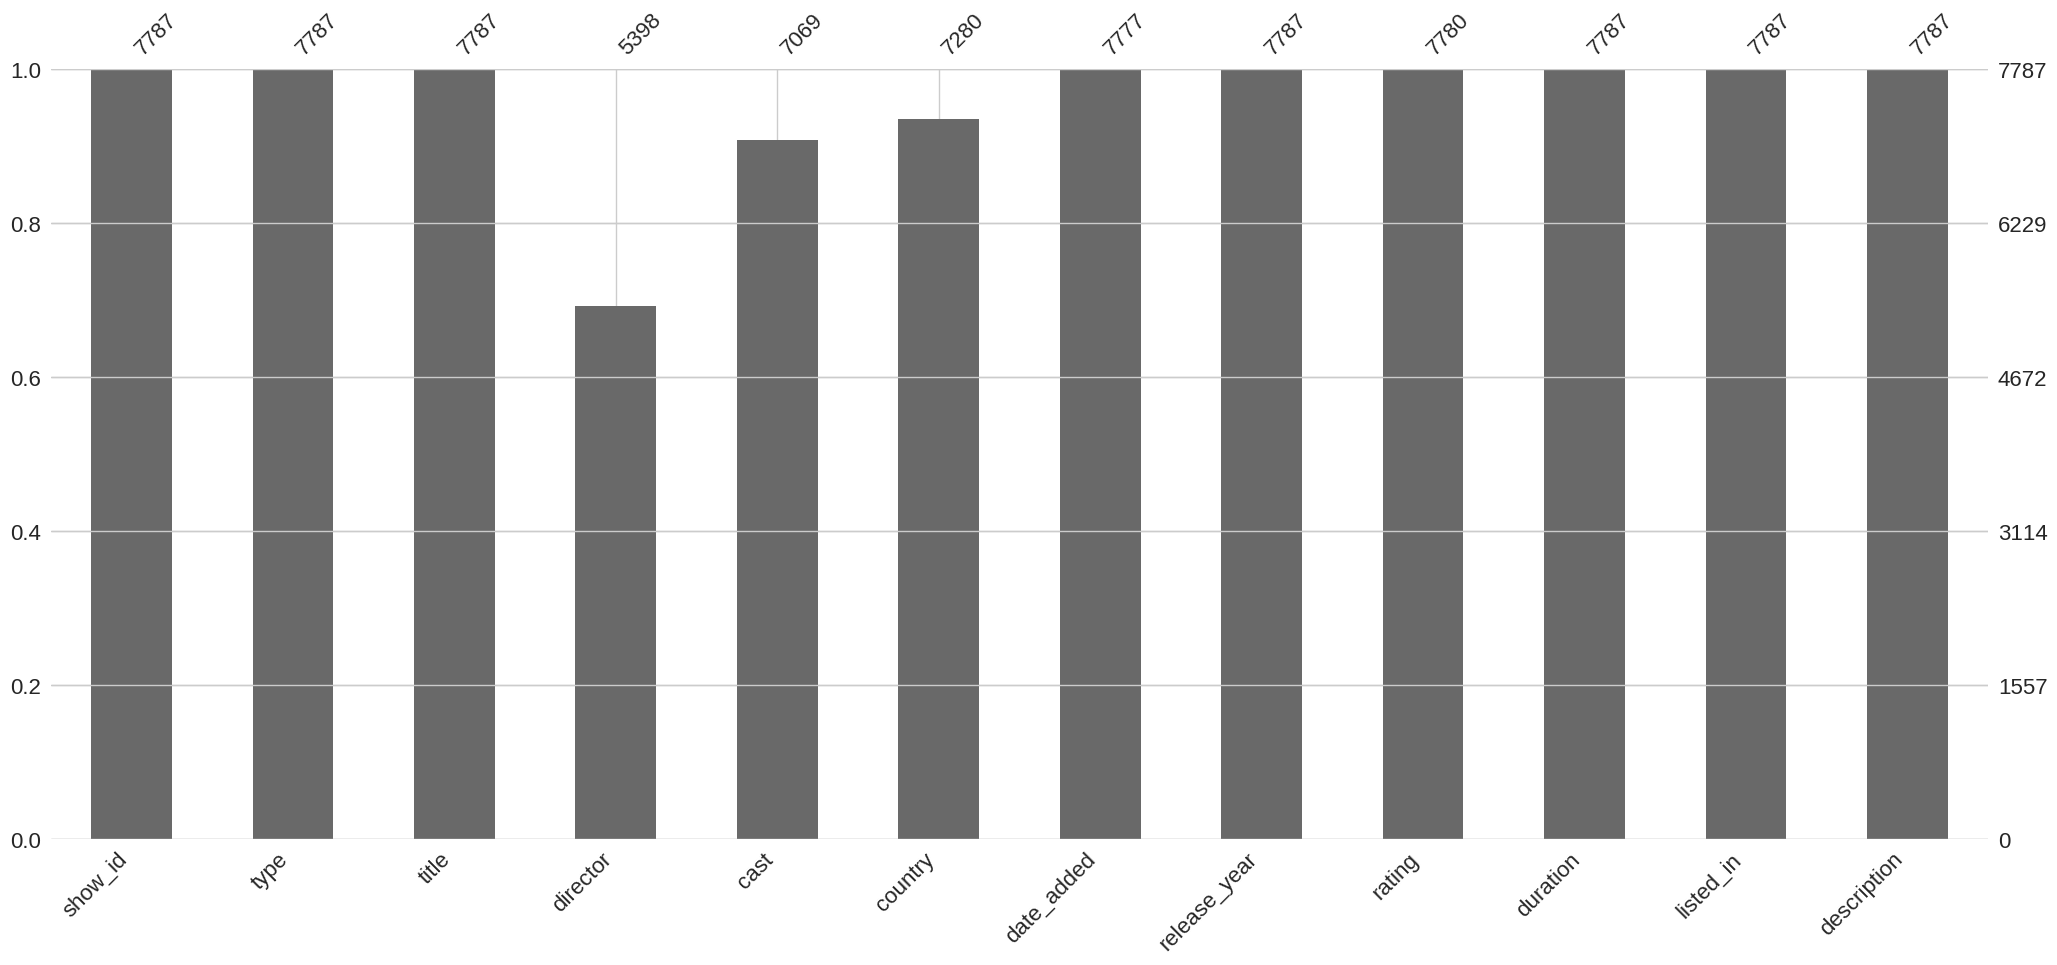

In [ ]:
# Visualizing the missing values
msno.bar(df);

### What did you know about your dataset?

The dataset has 7787 rows and 12 columns with most of the columns being object type except for 1 column which is int

The dataset also do not have any duplicated observations and it has few missing values in three of the 12 columns.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# Dataset
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

show_id: Unique Id for every movie/T.V show

type: Identifier- a movie or a t.v show

title: Title of the movie/t.v show

director: director of the show

cast: actors involved

country: country of production

date_added: date it was added on netflix

release_year: actual release of the show

rating: rating of the show/movie

duration: total duration in number of minutes or number of seasons

listed_in: genre

description: summary discription





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [146]:
# renaming listed_in column as genres
df.rename(columns={'listed_in':'genres'},inplace=True)

In [6]:
#count_types value counts
count_types=pd.DataFrame(df['type'].value_counts())
print('\033[1mCounts of Types of contents overall : \033[0m\n')
print(count_types)

Counts of Types of contents overall : 

         count
type          
Movie     5377
TV Show   2410


In [7]:
# dataframes by type
tv_df=df[df['type']=='TV Show']
movie_df=df[df['type']=='Movie']

In [8]:
#top years for the content types i.e tv_show and movies
top_year=pd.DataFrame(df.groupby('release_year')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
top_year_tv=pd.DataFrame(tv_df.groupby('release_year')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
top_year_movie=pd.DataFrame(movie_df.groupby('release_year')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
print('\033[1mTop year Overall : \033[0m\n')
print(top_year)

Top year Overall : 

              Total
release_year       
2018           1121
2017           1012
2019            996
2016            882
2020            868


In [9]:
# a look at top years for tv shows
print('\033[1mTop year TV shows : \033[0m\n')
print(top_year_tv)

Top year TV shows : 

              Total
release_year       
2020            457
2019            414
2018            387
2017            268
2016            240


In [10]:
# a look at top years for movies
print('\033[1mTop year movies : \033[0m\n')
print(top_year_movie)

Top year movies : 

              Total
release_year       
2017            744
2018            734
2016            642
2019            582
2020            411


In [11]:
def get_genre(x):
    ''' a function to get all the
        genres as a list'''
    genre = [i for i in x.split(',')]
    genre=[i.strip() for i in genre]
    return genre

def map_genre(df):
    ''' This function maps genres and returns a list of genres by their counts'''
    genre_dict={}

    for i,x in df.iterrows():
        genres=get_genre(x['genres'])
        for gen in genres:
          if gen not in genre_dict.keys():
            genre_dict[gen]=1
          if gen in genre_dict.keys():
            genre_dict[gen]+=1

    return genre_dict

In [12]:
#mapping genres for the dataset
genre_dict=map_genre(df.dropna(subset='genres'))
genre_df=pd.DataFrame.from_dict(genre_dict,orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
print('\033[1mTop genres overall : \033[0m\n')
print(genre_df)

Top genres overall : 

                              Total
International Movies           2438
Dramas                         2107
Comedies                       1472
International TV Shows         1200
Documentaries                   787
Action & Adventure              722
TV Dramas                       705
Independent Movies              674
Children & Family Movies        533
Romantic Movies                 532
TV Comedies                     526
Thrillers                       492
Crime TV Shows                  428
Kids' TV                        415
Docuseries                      354
Romantic TV Shows               334
Stand-Up Comedy                 330
Music & Musicals                322
Horror Movies                   313
British TV Shows                233
Reality TV                      223
Sci-Fi & Fantasy                219
Sports Movies                   197
Korean TV Shows                 151
TV Action & Adventure           151
Anime Series                    149
Spani

In [13]:
# functions to get actors and map their frequency
def get_actors(x):
    ''' a function to get all the
        actors as a list'''
    actors = [i for i in x.split(',')]
    actors=[i.strip() for i in actors]
    return actors

def map_actors(df):
    ''' This function maps actors and returns a list of genres by their counts'''
    actors_dict={}

    for i,x in df.iterrows():
        actors=get_actors(x['cast'])
        for act in actors:
          if act not in actors_dict.keys():
            actors_dict[act]=1
          if act in actors_dict.keys():
            actors_dict[act]+=1

    return actors_dict

In [14]:
#mapping actors for the dataset
actors_df=pd.DataFrame.from_dict(map_actors(df.dropna(subset='cast')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
print('\033[1mTop actors overall : \033[0m\n')
print(actors_df)

Top actors overall : 

                  Total
Anupam Kher          43
Shah Rukh Khan       36
Naseeruddin Shah     31
Om Puri              31
Akshay Kumar         30
...                 ...
Archie Alemania       2
Demore Barnes         2
Marty Adams           2
Nicole Boivin         2
Rachel Khoo           2

[32881 rows x 1 columns]


In [15]:
# creating dataframes for top 10 genres in the dataset
top10_genres = pd.DataFrame(df.groupby(['genres'])['show_id'].count().sort_values(ascending=False)).head(10).rename(columns={'show_id':'Total'})
print('\033[1mTop 10 genres overall : \033[0m\n')
print(top10_genres)

Top 10 genres overall : 

                                                  Total
genres                                                 
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161


In [16]:
# top genres for tv shows
top_genres_tv = pd.DataFrame(tv_df.groupby(['genres'])['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
print('\033[1mTop 5 genres for TV Shows : \033[0m\n')
print(top_genres_tv)

Top 5 genres for TV Shows : 

                                                    Total
genres                                                   
Kids' TV                                              205
International TV Shows, TV Dramas                     111
Crime TV Shows, International TV Shows, TV Dramas     106
Kids' TV, TV Comedies                                  90
International TV Shows, Romantic TV Shows, TV D...     86


In [17]:
# dataframes for value counts by top genres for movies
top_genres_movie = pd.DataFrame(movie_df.groupby(['genres'])['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
print('\033[1mTop 5 genres for movies : \033[0m\n')
print(top_genres_movie)

Top 5 genres for movies : 

                                                  Total
genres                                                 
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215


In [18]:
# dataframes for value coutns of top ratings overall
top_ratings=pd.DataFrame(df.groupby('rating')['show_id'].count().sort_values(ascending=False)).rename(columns={'show_id':'Total'})
print('\033[1mTop ratings overall : \033[0m\n')
print(top_ratings)

Top ratings overall : 

          Total
rating         
TV-MA      2863
TV-14      1931
TV-PG       806
R           665
PG-13       386
TV-Y        280
TV-Y7       271
PG          247
TV-G        194
NR           84
G            39
TV-Y7-FV      6
UR            5
NC-17         3


In [19]:
# dataframes for value coutns of top ratings by type
top_ratings_tv=pd.DataFrame(tv_df.groupby('rating')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
top_ratings_movie=pd.DataFrame(movie_df.groupby('rating')['show_id'].count().sort_values(ascending=False)).head(5)
print('\033[1mTop ratings for TV Shows : \033[0m\n')
print(top_ratings_tv)

Top ratings for TV Shows : 

        Total
rating       
TV-MA    1018
TV-14     659
TV-PG     301
TV-Y7     176
TV-Y      163


In [20]:
# a look at top ratings at movies
print('\033[1mTo ratings by movie type : \033[0m\n')
print(top_ratings_movie)

To ratings by movie type : 

        show_id
rating         
TV-MA      1845
TV-14      1272
R           663
TV-PG       505
PG-13       386


In [21]:
# dataframe for value counts by countries overall
top10_countries=pd.DataFrame(df.groupby('country')['show_id'].count().sort_values(ascending=False)).head(10).rename(columns={'show_id':'Total Movies'})
print('\033[1mTop 10 countries by content : \033[0m\n')
print(top10_countries)

Top 10 countries by content : 

                Total Movies
country                     
United States           2555
India                    923
United Kingdom           397
Japan                    226
South Korea              183
Canada                   177
Spain                    134
France                   115
Egypt                    101
Mexico                   100


In [22]:
# dataframe by value counts for countries by tv show type
top_countries_tv=pd.DataFrame(tv_df.groupby('country')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total Movies'})
print('\033[1mTop countries for tv show type : \033[0m\n')
print(top_countries_tv)

Top countries for tv show type : 

                Total Movies
country                     
United States            705
United Kingdom           204
Japan                    157
South Korea              147
India                     71


In [23]:
# dataframe by value counts for countries by movie type
top_countries_movie=pd.DataFrame(movie_df.groupby('country')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total Movies'})
print('\033[1mTop countries for movie type : \033[0m\n')
print(top_countries_movie)

Top countries for movie type : 

                Total Movies
country                     
United States           1850
India                    852
United Kingdom           193
Canada                   118
Spain                     89


In [24]:

def check_country(x,country):
  """Function to check if the tv-show/movie is aired in which countries
     returns a series a True/False to slice the indexes and select only the ones in which country is present"""
  if (type(x)==str):
        if country in [i.strip() for i in x.split(',')]:
            return True
        else:
            return False
  else:
          return False

#creating the dataframes with the countries(India,United States,United Kingdom) it is present/aired in

US_df=df[df['country'].apply(lambda x: check_country(x=x,country='United States'))]
India_df=df[df['country'].apply(lambda x: check_country(x=x,country='India'))]
UK_df=df[df['country'].apply(lambda x: check_country(x=x,country='United Kingdom'))]

#count of tv-show/movie by countries

US_types=pd.DataFrame(US_df['type'].value_counts())
UK_types=pd.DataFrame(UK_df['type'].value_counts())
India_types=pd.DataFrame(India_df['type'].value_counts())

#top genres for the three countries above

top_genres_us = pd.DataFrame(US_df.groupby(['genres'])['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
top_genres_india = pd.DataFrame(India_df.groupby(['genres'])['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
top_genres_uk = pd.DataFrame(UK_df.groupby(['genres'])['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})

#top ratings by counutries

top_ratings_India=pd.DataFrame(India_df.groupby('rating')['show_id'].count().sort_values(ascending=False))
top_ratings_us=pd.DataFrame(US_df.groupby('rating')['show_id'].count().sort_values(ascending=False))
top_ratings_uk=pd.DataFrame(UK_df.groupby('rating')['show_id'].count().sort_values(ascending=False))


#top year by the count of show/movie

top_year_uk=pd.DataFrame(UK_df.groupby('release_year')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
top_year_us=pd.DataFrame(US_df.groupby('release_year')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})
top_year_india=pd.DataFrame(India_df.groupby('release_year')['show_id'].count().sort_values(ascending=False)).head(5).rename(columns={'show_id':'Total'})


#actors in movies available by countries

India_actors_df=pd.DataFrame.from_dict(map_actors(df.dropna(subset='cast')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
US_actors_df=pd.DataFrame.from_dict(map_actors(US_df.dropna(subset='cast')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
UK_actors_df=pd.DataFrame.from_dict(map_actors(UK_df.dropna(subset='cast')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)

#genres of movies available by countries

India_genre_df=pd.DataFrame.from_dict(map_genre(India_df.dropna(subset='genres')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
US_genre_df=pd.DataFrame.from_dict(map_genre(US_df.dropna(subset='genres')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
UK_genre_df=pd.DataFrame.from_dict(map_genre(UK_df.dropna(subset='genres')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)


#tv show type dataframes by countries
India_tv=India_df[India_df['type']=='TV Show']
US_tv=US_df[US_df['type']=='TV Show']
UK_tv=UK_df[UK_df['type']=='TV Show']

#movie type dataframes by countries
India_movie=India_df[India_df['type']=='Movie']
US_movie=US_df[US_df['type']=='Movie']
UK_movie=UK_df[UK_df['type']=='Movie']

#genres for tv-show types by countries
India_tv_genre=pd.DataFrame.from_dict(map_genre(India_tv.dropna(subset='genres')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
US_tv_genre=pd.DataFrame.from_dict(map_genre(US_tv.dropna(subset='genres')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
UK_tv_genre=pd.DataFrame.from_dict(map_genre(UK_tv.dropna(subset='genres')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})

#genres for movie type by countries
India_movie_genre=pd.DataFrame.from_dict(map_genre(India_movie.dropna(subset='genres')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
US_movie_genre=pd.DataFrame.from_dict(map_genre(US_movie.dropna(subset='genres')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
UK_movie_genre=pd.DataFrame.from_dict(map_genre(UK_movie.dropna(subset='genres')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})

#actors in tv-show type by countries
India_tv_actors_df=pd.DataFrame.from_dict(map_actors(India_tv.dropna(subset='cast')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
US_tv_actors_df=pd.DataFrame.from_dict(map_actors(US_tv.dropna(subset='cast')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
UK_tv_actors_df=pd.DataFrame.from_dict(map_actors(UK_tv.dropna(subset='cast')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})

#actors in movie type by countries
India_movie_actors_df=pd.DataFrame.from_dict(map_actors(India_movie.dropna(subset='cast')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
US_movie_actors_df=pd.DataFrame.from_dict(map_actors(US_movie.dropna(subset='cast')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
UK_movie_actors_df=pd.DataFrame.from_dict(map_actors(UK_movie.dropna(subset='cast')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})



In [25]:
# first look at various dataframes created
print('\033[1mUK_movie_actors_df : \033[0m\n')
print(UK_movie_actors_df.head())

UK_movie_actors_df : 

                      Total
John Cleese              12
Michael Palin            10
Helena Bonham Carter      9
Eddie Marsan              8
Johnny Depp               8


In [26]:
print('\033[1mIndia_actors_df : \033[0m\n')
print(India_actors_df.head())

India_actors_df : 

                  Total
Anupam Kher          43
Shah Rukh Khan       36
Naseeruddin Shah     31
Om Puri              31
Akshay Kumar         30


In [27]:
print('\033[1mUS_actors_df : \033[0m\n')
print(US_actors_df.head())

US_actors_df : 

                 Total
Tara Strong         21
Fred Tatasciore     20
Adam Sandler        20
James Franco        19
Nicolas Cage        19


In [28]:
print('\033[1mUK_actors_df : \033[0m\n')
print(UK_actors_df.head())

UK_actors_df : 

                    Total
David Attenborough     17
John Cleese            17
Michael Palin          15
Terry Jones            13
Eric Idle              13


In [29]:
print('\033[1mtop_genres_US : \033[0m\n')
print(top_genres_us.head())

top_genres_US : 

                                    Total
genres                                   
Documentaries                         270
Stand-Up Comedy                       207
Children & Family Movies, Comedies    129
Kids' TV                              110
Dramas                                100


In [30]:
print('\033[1mtop_genres_india : \033[0m\n')
print(top_genres_india.head())

top_genres_india : 

                                                  Total
genres                                                 
Dramas, International Movies                        121
Comedies, Dramas, International Movies              118
Dramas, Independent Movies, International Movies    109
Dramas, International Movies, Romantic Movies        59
Action & Adventure, Dramas, International Movies     56


In [31]:
print('\033[1mtop_genres_uk : \033[0m\n')
print(top_genres_uk.head())

top_genres_uk : 

                                                    Total
genres                                                   
Documentaries                                          49
Documentaries, International Movies                    34
British TV Shows, Docuseries, International TV ...     28
British TV Shows, International TV Shows, Reali...     22
British TV Shows, Docuseries, Science & Nature TV      21


In [32]:
print('\033[1mUS_types : \033[0m\n')
print(US_types.head())

US_types : 

         count
type          
Movie     2431
TV Show    866


In [33]:
print('\033[1mUK_types : \033[0m\n')
print(UK_types.head())

UK_types : 

         count
type          
Movie      467
TV Show    256


In [34]:
print('\033[1mIndia_types : \033[0m\n')
print(India_types.head())

India_types : 

         count
type          
Movie      915
TV Show     75


In [35]:
print('\033[1mtop_ratings_India : \033[0m\n')
print(top_ratings_India.head())

top_ratings_India : 

        show_id
rating         
TV-14       542
TV-MA       246
TV-PG       142
TV-Y7        14
TV-G         10


In [36]:
print('\033[1mtop_ratings_us : \033[0m\n')
print(top_ratings_us.head())

top_ratings_us : 

        show_id
rating         
TV-MA      1034
R           539
TV-14       464
PG-13       340
TV-PG       289


In [37]:
print('\033[1mtop_ratings_uk : \033[0m\n')
print(top_ratings_uk.head())

top_ratings_uk : 

        show_id
rating         
TV-MA       237
R           120
TV-14        97
TV-PG        95
PG-13        66


In [38]:
print('\033[1mtop_year_uk : \033[0m\n')
print(top_year_uk.head())

top_year_uk : 

              Total
release_year       
2017            101
2016             98
2018             90
2020             68
2015             63


In [39]:
print('\033[1mtop_year_US : \033[0m\n')
print(top_year_us.head())

top_year_US : 

              Total
release_year       
2018            442
2017            437
2019            427
2020            377
2016            333


In [40]:
print('\033[1mtop_year_india : \033[0m\n')
print(top_year_india.head())

top_year_india : 

              Total
release_year       
2017            111
2018            102
2019             90
2016             79
2015             70


In [41]:
# creating a function to get countires and map them by their frequency
def get_country(x):
    ''' a function to get all the
        countries as a list'''
    countries=x.split(',')
    countries=[i.strip() for i in countries]
    return countries

def map_country(df):
    ''' This function maps actors and returns a list of coutnries by their counts'''
    country_dict={}

    for i,x in df.iterrows():
        countries=get_country(x['country'])
        for country in countries:
          if country not in country_dict.keys():
            country_dict[country]=1
          if country in country_dict.keys():
            country_dict[country]+=1

    return country_dict

country_df=pd.DataFrame.from_dict(map_country(df.dropna(subset='country')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
print('\033[1mTop 5 countries : \033[0m\n')
print(country_df.head())

Top 5 countries : 

                Total
United States    3298
India             991
United Kingdom    724
Canada            413
France            350


In [42]:
# creating function to get all directors and map them by their count of movie/TV show directed
def get_director(x):
    ''' a function to get all the
        directors as a list'''
    directors=x.split(',')
    directors=[i.strip() for i in directors]
    return directors

def map_director(df):
    ''' This function maps actors and returns a list of directors by their counts'''
    director_dict={}

    for i,x in df.iterrows():
        directors=get_director(x['director'])
        for dir in directors:
          if dir not in director_dict.keys():
            director_dict[dir]=1
          if dir in director_dict.keys():
            director_dict[dir]+=1

    return director_dict


#creating directors dataframes by countries and overall
director_df = pd.DataFrame.from_dict(map_director(df.dropna(subset='director')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
India_director_df=pd.DataFrame.from_dict(map_director(India_df.dropna(subset='director')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
US_director_df=pd.DataFrame.from_dict(map_director(US_df.dropna(subset='director')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)
UK_director_df=pd.DataFrame.from_dict(map_director(UK_df.dropna(subset='director')),orient='index').rename(columns={0:'Total'}).sort_values('Total',ascending=False)

#creating directors dataframes on basis type of show/movie and country
tv_director=pd.DataFrame.from_dict(map_director(tv_df.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
movie_director=pd.DataFrame.from_dict(map_director(movie_df.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})

#for tv-show type and countries
India_tv_director=pd.DataFrame.from_dict(map_director(India_tv.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
US_tv_director=pd.DataFrame.from_dict(map_director(US_tv.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
UK_tv_director=pd.DataFrame.from_dict(map_director(UK_tv.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})

#for movie-type and countries
India_movie_director=pd.DataFrame.from_dict(map_director(India_movie.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
US_movie_director=pd.DataFrame.from_dict(map_director(US_movie.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})
UK_movie_director=pd.DataFrame.from_dict(map_director(UK_movie.dropna(subset='director')),orient='index').sort_values(0,ascending=False).rename(columns={0:'Total'})

In [43]:
print('\033[1mTop directors overall : \033[0m\n')
print(director_df.head())

Top directors overall : 

                     Total
Jan Suter               22
Raúl Campos             20
Marcus Raboy            17
Jay Karas               16
Cathy Garcia-Molina     14


In [44]:
print('\033[1mTop Director for TV types : \033[0m\n')
print(tv_director.head())

Top Director for TV types : 

                     Total
Alastair Fothergill      4
Ken Burns                4
Iginio Straffi           3
Lynn Novick              3
Jung-ah Im               3


In [45]:
print('\033[1mTop Director for movie types : \033[0m\n')
print(movie_director.head())

Top Director for movie types : 

                     Total
Jan Suter               22
Raúl Campos             20
Jay Karas               16
Marcus Raboy            16
Cathy Garcia-Molina     14


In [46]:
print('\033[1mTop Directors For United States : \033[0m\n')
print('\033[1mOverall : \033[0m\n')
print(US_director_df.head())
print('\n\033[1mFor TV-show : \033[0m\n')
print(US_tv_director.head())
print('\n\033[1mFor Movies : \033[0m\n')
print(US_movie_director.head())

Top Directors For United States : 

Overall : 

                  Total
Marcus Raboy         16
Jay Karas            16
Jay Chapman          13
Martin Scorsese      13
Steven Spielberg     11

For TV-show : 

                 Total
Ken Burns            4
Lynn Novick          3
Stan Lathan          3
Rob Seidenglanz      3
Jesse Warn           2

For Movies : 

                  Total
Jay Karas            16
Marcus Raboy         15
Jay Chapman          13
Martin Scorsese      13
Steven Spielberg     11


In [47]:
print('\033[1mTop Directors For United Kingdom : \033[0m\n')
print('\033[1mOverall : \033[0m\n')
print(UK_director_df.head())
print('\n\033[1mFor TV-show : \033[0m\n')
print(UK_tv_director.head())
print('\n\033[1mFor Movies : \033[0m\n')
print(UK_movie_director.head())

Top Directors For United Kingdom : 

Overall : 

                       Total
Edward Cotterill           5
Alastair Fothergill        5
Tom Hooper                 4
Orlando von Einsiedel      4
Terry Gilliam              4

For TV-show : 

                     Total
Alastair Fothergill      4
Philippa Lowthorpe       2
Tony Collingwood         2
Michael Cumming          2
Greg Tiernan             2

For Movies : 

                       Total
Edward Cotterill           5
Orlando von Einsiedel      4
Martin Campbell            4
Tom Hooper                 4
Terry Gilliam              4


In [48]:
print('\033[1mTop Directors For India : \033[0m\n')
print('\033[1mOverall : \033[0m\n')
print(India_director_df.head())
print('\n\033[1mFor TV-show : \033[0m\n')
print(India_tv_director.head())
print('\n\033[1mFor Movies : \033[0m\n')
print(India_movie_director.head())

Top Directors For India : 

Overall : 

                  Total
Anurag Kashyap       10
David Dhawan         10
Umesh Mehra           9
Dibakar Banerjee      8
Priyadarshan          7

For TV-show : 

                 Total
Nizar Shafi          2
Patrick Graham       2
Soumendra Padhi      2
Sudha Kongara        2
Vignesh Shivan       2

For Movies : 

                    Total
David Dhawan           10
Umesh Mehra             9
Anurag Kashyap          9
Dibakar Banerjee        8
Sooraj R. Barjatya      7


### What all manipulations have you done and insights you found?

**Dataframes were created by types of contents, by years where most content was added first overall and then by types of content. Then genres individually for same three categories as above were mapped with . Cast feature also had multiple actors in a single observation and function to get individual actors from a observation and then a function to map the actors and directors were created. Then top genres and top actors overall and by types of content were mappedped. Dataframes for top rating by content and overall were also created. Then top countries by amount of content were also observed and same analysis of top ratings, actors, genres,directors and top years  were done**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

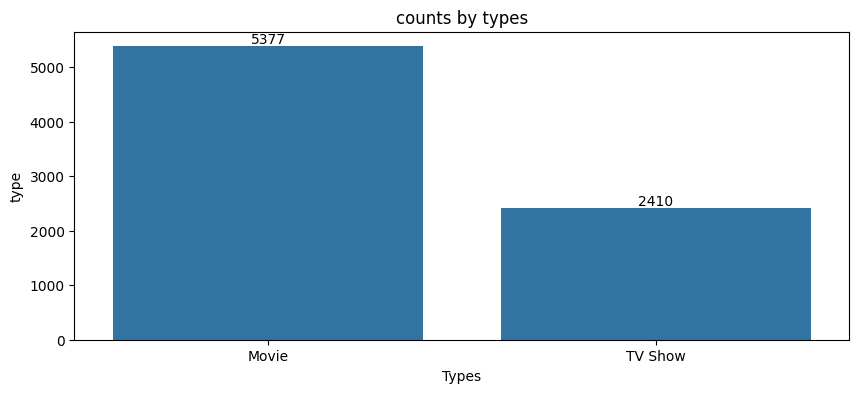

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,4))
ax=sns.barplot(df['type'].value_counts())
plt.title('counts by types')
plt.xlabel('Types')
for i in ax.containers:
  ax.bar_label(i)

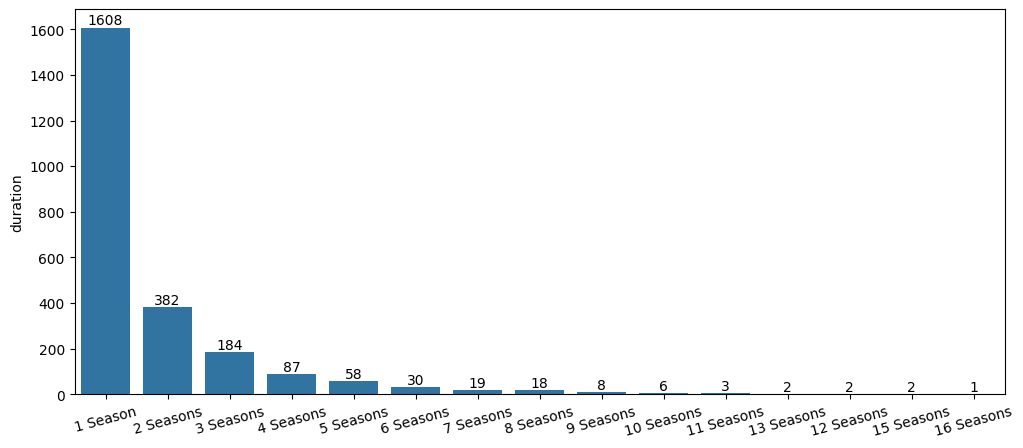

In [ ]:
#tv_df['duration'].value_counts().plot(kind='bar',figsize=(12,6))
plt.figure(figsize=(12,5))
ax=sns.barplot(tv_df['duration'].value_counts())
plt.xticks(rotation=15);
ax.bar_label(ax.containers[0]);

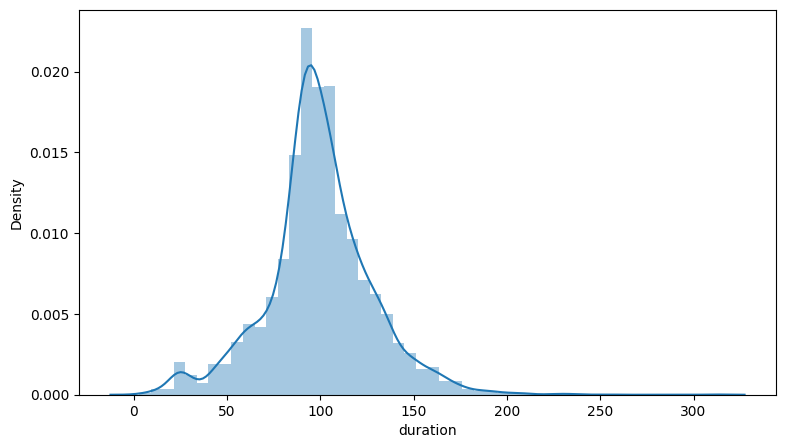

In [ ]:
plt.figure(figsize=(9,5))
sns.distplot(movie_df['duration'].apply(lambda x: x.split()[0]));

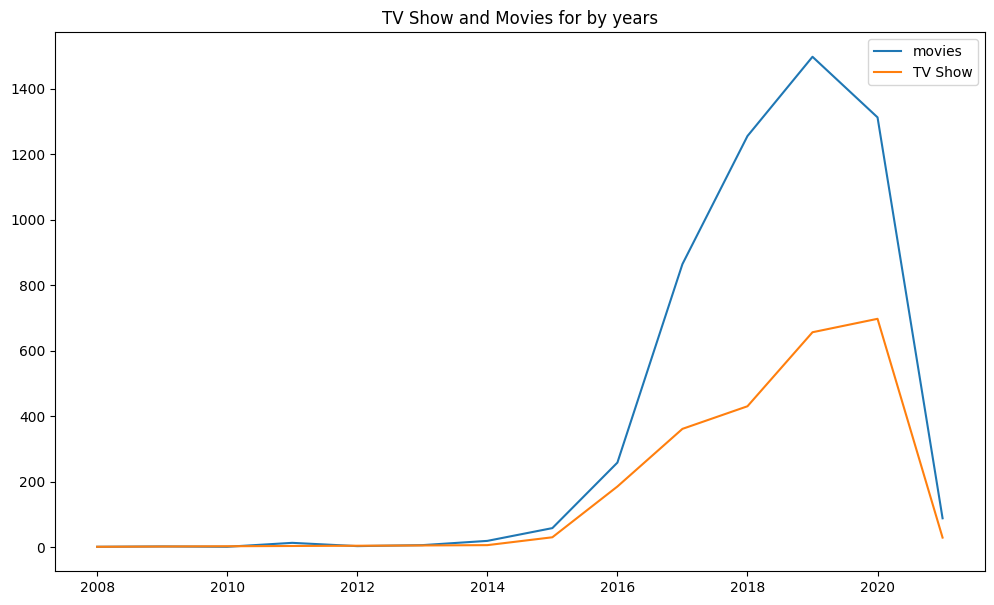

In [ ]:
#tv shows and movies by year
plt.figure(figsize=(12,7))
plt.plot(movie_df.groupby(movie_df['date_added'].dt.year)['title'].count(),label='movies')
plt.plot(tv_df.groupby(tv_df['date_added'].dt.year)['title'].count(),label='TV Show')
plt.title('TV Show and Movies for by years')
plt.legend()

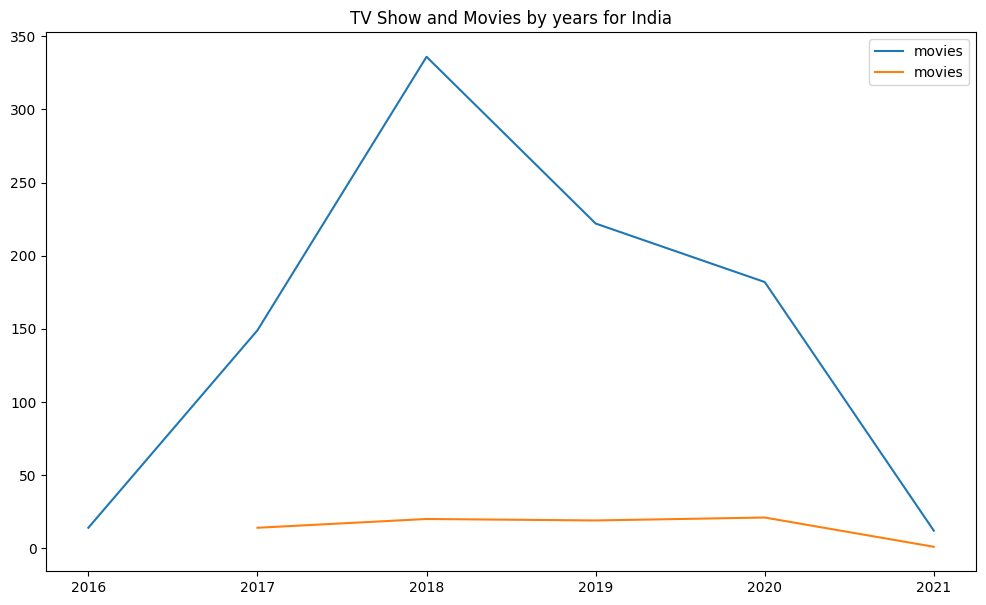

In [ ]:
#tv shows and movies by year
plt.figure(figsize=(12,7))
plt.plot(India_df[India_df['type']=='Movie'].groupby(India_df[India_df['type']=='Movie']['date_added'].dt.year)['title'].count(),label='movies')
plt.plot(India_df[India_df['type']=='TV Show'].groupby(India_df[India_df['type']=='TV Show']['date_added'].dt.year)['title'].count(),label='movies')
plt.title('TV Show and Movies by years for India')
plt.legend()

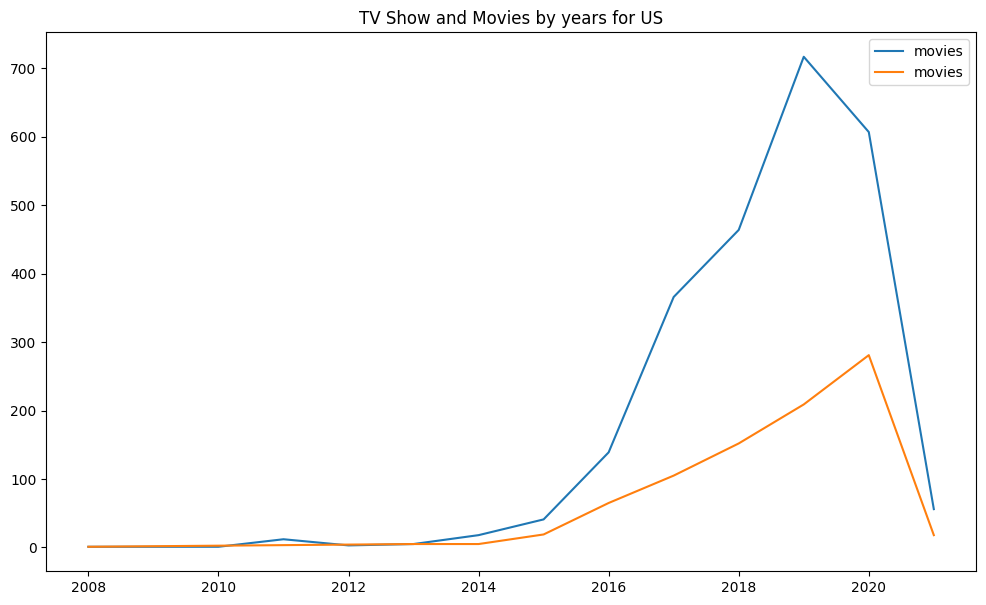

In [ ]:
#tv shows and movies by year
plt.figure(figsize=(12,7))
plt.plot(US_df[US_df['type']=='Movie'].groupby(US_df[US_df['type']=='Movie']['date_added'].dt.year)['title'].count(),label='movies')
plt.plot(US_df[US_df['type']=='TV Show'].groupby(US_df[US_df['type']=='TV Show']['date_added'].dt.year)['title'].count(),label='movies')
plt.title('TV Show and Movies by years for US')
plt.legend()

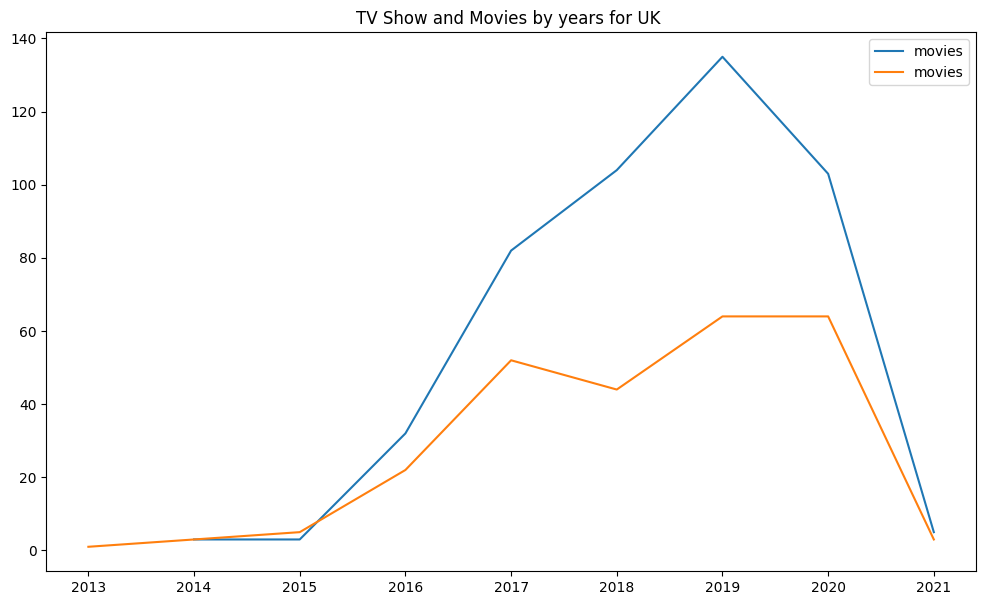

In [ ]:
#tv shows and movies by year
plt.figure(figsize=(12,7))
plt.plot(UK_df[UK_df['type']=='Movie'].groupby(UK_df[UK_df['type']=='Movie']['date_added'].dt.year)['title'].count(),label='movies')
plt.plot(UK_df[UK_df['type']=='TV Show'].groupby(UK_df[UK_df['type']=='TV Show']['date_added'].dt.year)['title'].count(),label='movies')
plt.title('TV Show and Movies by years for UK ')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

Value counts for type of content(best represented by bar char or pie chart for categorical features). Duration of type of content i.e TV Shows(seasons) and Movies(minutes) also by bar chart. Then amount of content added years by types(TV Shows/Movies) by line chart for  

*   Overall
*   By top countries i.e United States, India, United Kingdom



##### 2. What is/are the insight(s) found from the chart?



**Total Count** : Movie(5377) ----- TV Shows(2410)

---
**Most frequent Duration** : Movie(90 minutes) ----- TV Shows(1 season)


---

**Top Years for amount of content** :



*   **Overall** : Movie(2019) ----- TV Shows(2020)
*   **India** : Movie(2018) ----- TV Shows(2020)
*   **United States** : Movie(2019) ----- TV Shows(2020)
*   **United Kingdom** : Movie(2019) ----- TV Shows(2019)






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

These charts provide an idea of how the clusters can be based on types of content/years/duration/country

#### Chart - 2: Ratings Overall

In [ ]:
def auto_pct_format(x):
  total_counts=len(df)
  return '{:.2f}%\n{:.0f}'.format(x,total_counts*x/100)

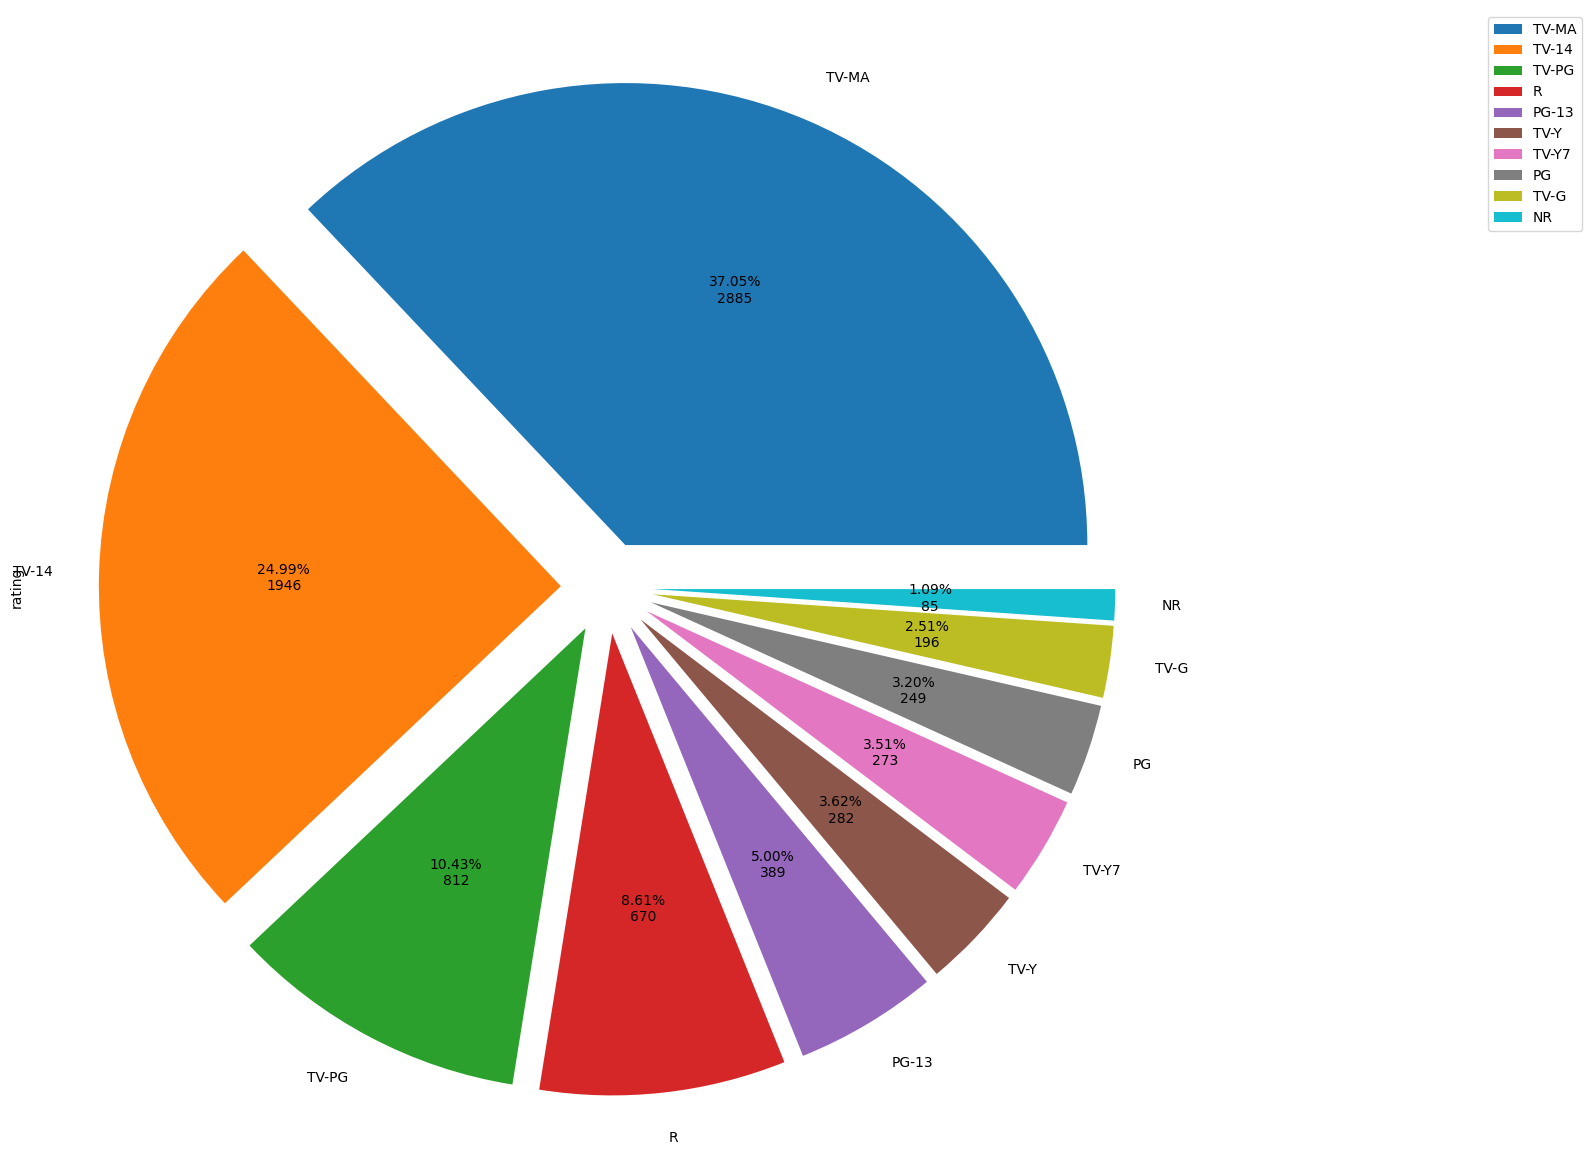

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,15))
df['rating'].value_counts()[:10].plot(kind='pie',explode=[.1 for i in range(len(df['rating'].value_counts()[:10]))],autopct=auto_pct_format)
plt.legend(loc='upper right',bbox_to_anchor=(1.35,1))

##### 1. Why did you pick the specific chart?



A pie chart helps organize and show data as a actual number and percentage of a whole. Amount of content by ratings with percentage is represented

##### 2. What is/are the insight(s) found from the chart?


**Top 3 Ratings :**

*   **TV-MA** : 37%
*   **TV-14** : 24.99%
*   **TV-PG** : 10.43%





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most frequent Ratings should also provide the clustering patterns for the data

#### Chart - 3: Actors

<Figure size 640x480 with 0 Axes>

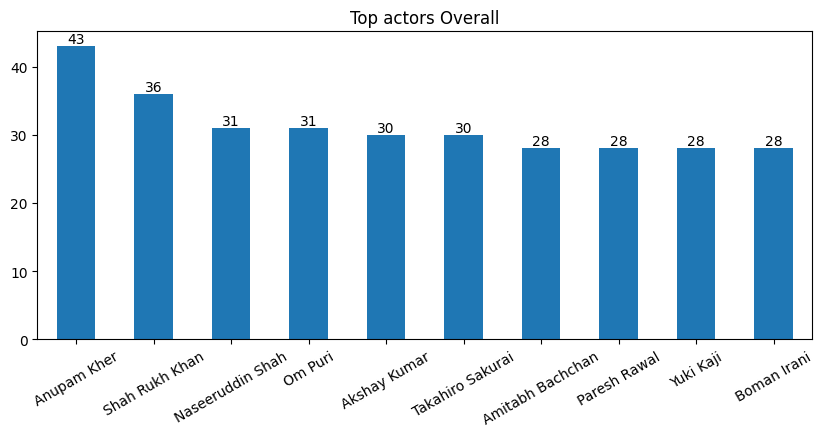

<Figure size 640x480 with 0 Axes>

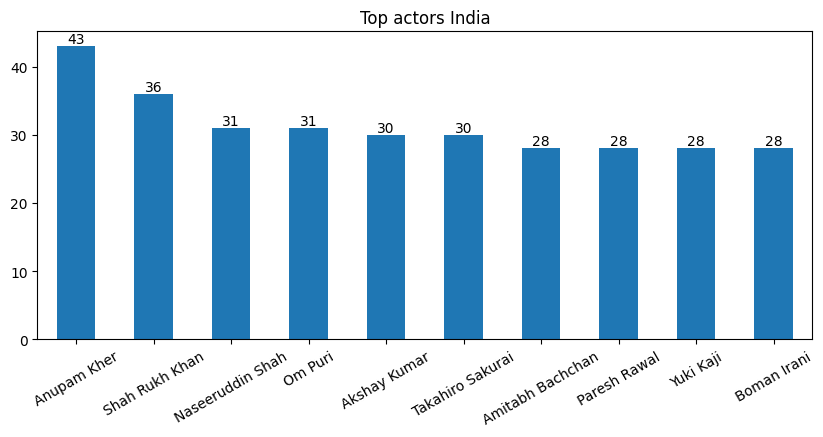

<Figure size 640x480 with 0 Axes>

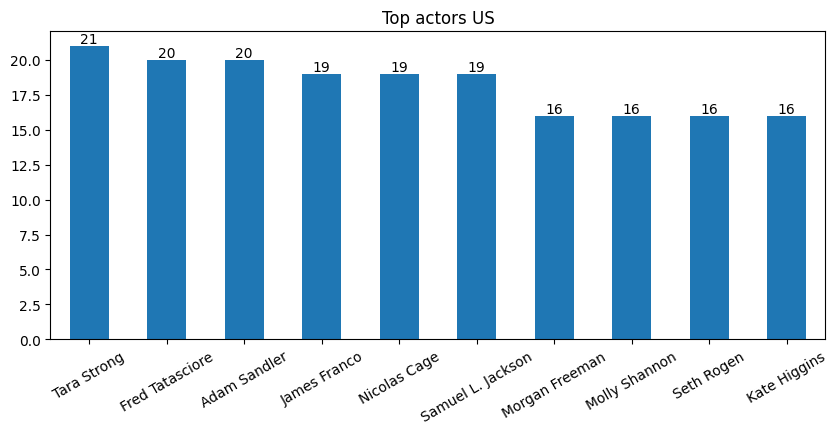

<Figure size 640x480 with 0 Axes>

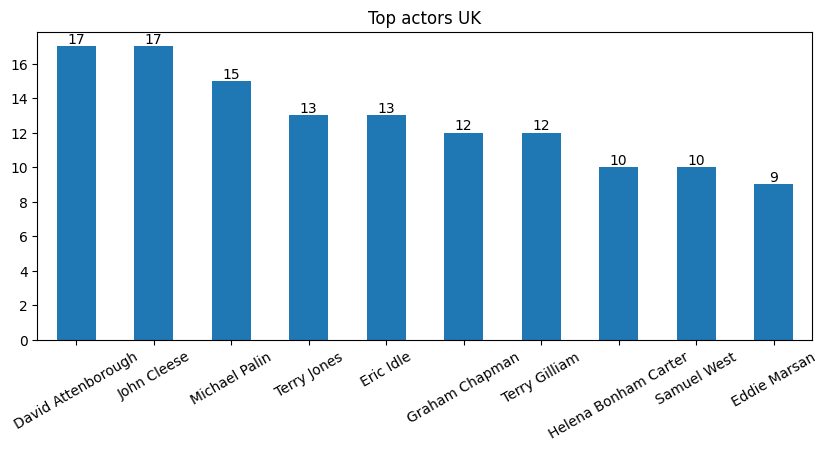

In [ ]:
# Chart - 3 visualization
i=0
title=['Overall','India','US','UK']
for i_df in [actors_df,India_actors_df,US_actors_df,UK_actors_df]:
    plt.figure()
    ax=i_df.iloc[:10].plot(kind='bar',figsize=(10,4));
    ax.get_legend().remove()
    plt.xticks(rotation=30)
    plt.title(f'Top actors {title[i]}')
    i+=1
    for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others which in this case is actors

##### 2. What is/are the insight(s) found from the chart?

**Top actors are :**


---


*   **Overall** : Anupam Kher(43), Shah Rukh Khan(36), Naseeruddin Shah(31)

---


*   **India** : Anupam Kher(43), Shah Rukh Khan(36), Naseeruddin Shah(31)

---


*   **United States** : Tara Strong(21), Fred Tatasciore(20), Adam Sandler(20)

---


*   **United Kingdom** : David Attenborough(17), John Cleese(17), Micheal Pali(15)






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Actors with most content overall and by countries can also show cluster pattern as cast and country can together give a good example of a cluster.

#### Chart - 4: Ratings by TV-Show/Movie type

<Figure size 640x480 with 0 Axes>

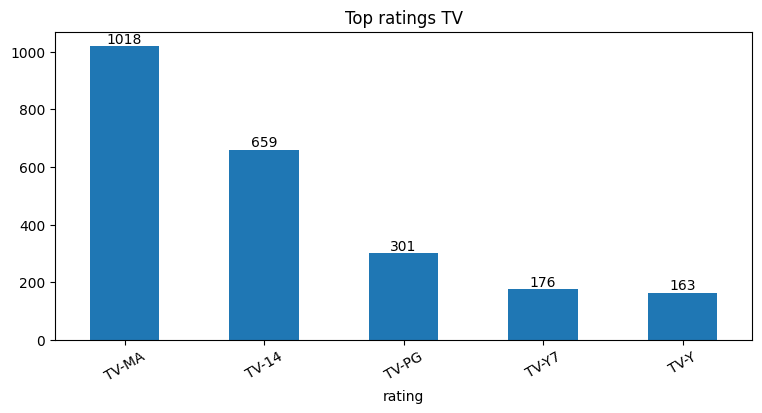

<Figure size 640x480 with 0 Axes>

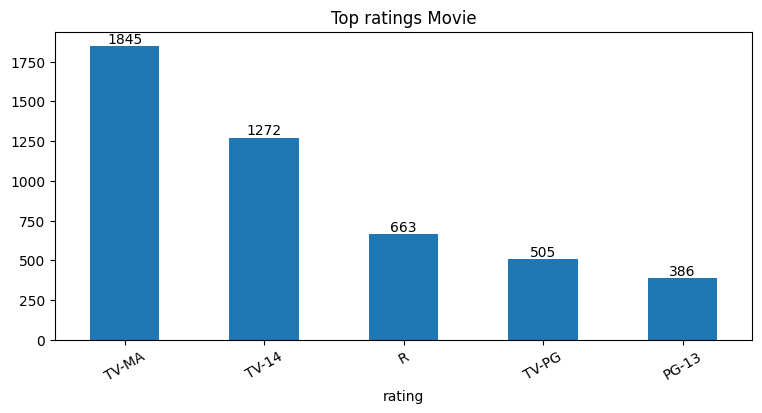

In [ ]:
# Chart - 4 visualization code
# top_ratings_India,top_ratings_us,top_ratings_uk, 'overall','India','US','UK',
i=0
title=['TV','Movie']
for x_df in [top_ratings_tv,top_ratings_movie]:
    plt.figure()
    ax=x_df.iloc[:10].plot(kind='bar',figsize=(9,4));
    ax.get_legend().remove()
    plt.xticks(rotation=30)
    plt.title(f'Top ratings {title[i]}')
    i+=1
    for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');


##### 1. Why did you pick the specific chart?

From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others which in this case is ratings

##### 2. What is/are the insight(s) found from the chart?

**Top ratings are :**


---


*   **Overall** : Anupam Kher(43), Shah Rukh Khan(36), Naseeruddin Shah(31)

---


*   **India** : Anupam Kher(43), Shah Rukh Khan(36), Naseeruddin Shah(31)

---


*   **United States** : Tara Strong(21), Fred Tatasciore(20), Adam Sandler(20)

---


*   **United Kingdom** : David Attenborough(17), John Cleese(17), Micheal Pali(15)






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top actors by countries and overall can give an idea of clusters

#### Chart - 5 : Ratings by Countries

<Figure size 640x480 with 0 Axes>

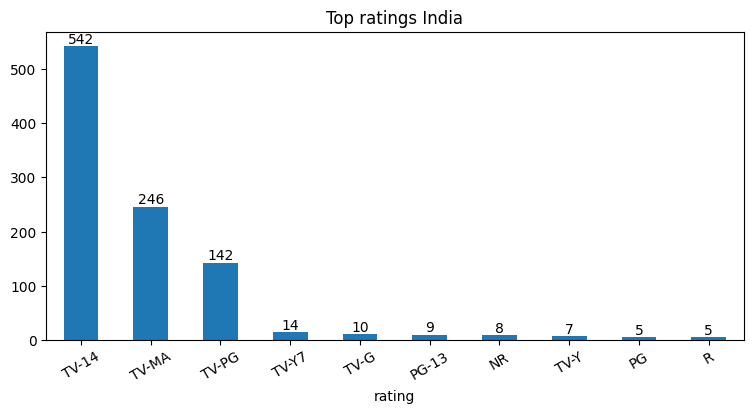

<Figure size 640x480 with 0 Axes>

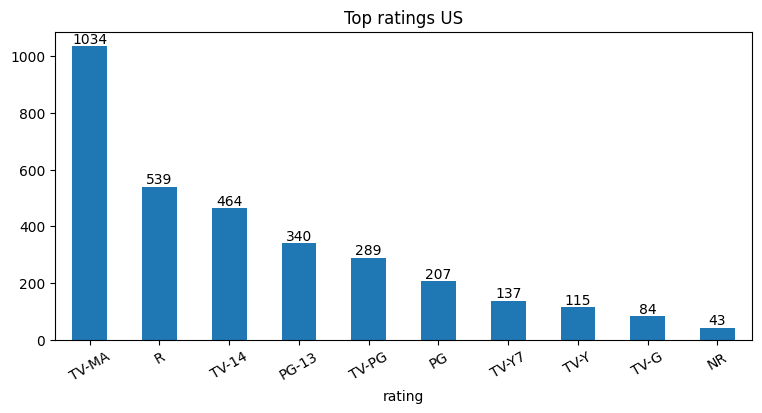

<Figure size 640x480 with 0 Axes>

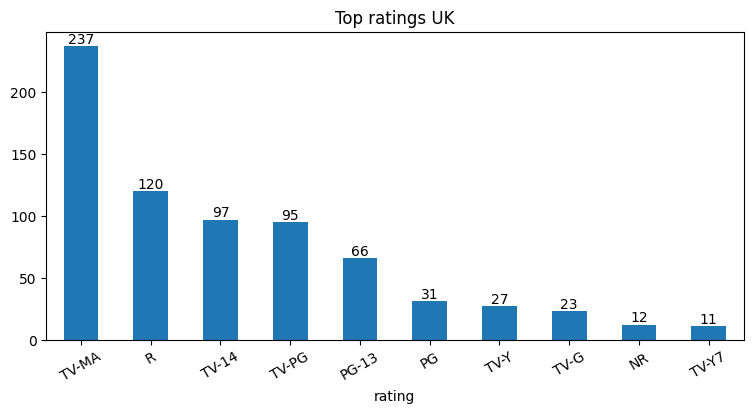

In [ ]:
# Chart - 5 visualization code
i=0
title=['India','US','UK']
for x_df in [top_ratings_India,top_ratings_us,top_ratings_uk]:
    plt.figure()
    ax=x_df.iloc[:10].plot(kind='bar',figsize=(9,4));
    ax.get_legend().remove()
    plt.xticks(rotation=30)
    plt.title(f'Top ratings {title[i]}')
    i+=1
    for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');


##### 1. Why did you pick the specific chart?

From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others which in this case is ratings by top countries

##### 2. What is/are the insight(s) found from the chart?

**Top ratings for**

*   **India**: *TV-14*(542), *TV-MA*(246) and third being *TV-PG*(142)
*   **United States**: *TV-MA*(1043), *R*(539) and third being *TV-14*(142)
*   **United Kingdom**: *TV-MA*(237), *R*(120) and third being *TV-14*(97)




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Cluster can have features with values of these countries and particular ratings as certain patterns.

#### Chart - 6: Genre

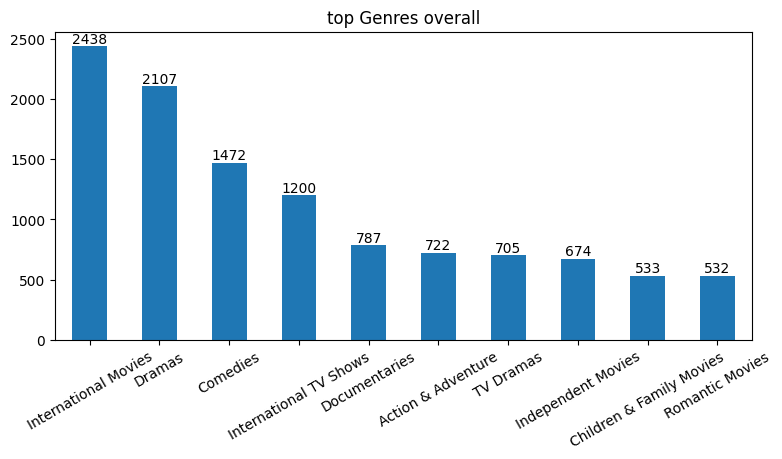

In [ ]:
# Chart - 6 visualization code
ax=genre_df.head(10).plot(kind='bar',figsize=(9,4))
plt.xticks(rotation=30)
plt.title('top Genres overall')
ax.get_legend().remove()
for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others which in this case is genres.

##### 2. What is/are the insight(s) found from the chart?

**Genres** with most content are *International Movies*(2438), *Dramas*(2107) and third is *Comedies*(1472), fourth is *International TV Shows*(1200) and fifth is *Documentaries*(787).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If clustering will have patterns by genres for content these charts show top genres and clusters by these values.

#### Chart - 7 Genre by Countries

<Figure size 640x480 with 0 Axes>

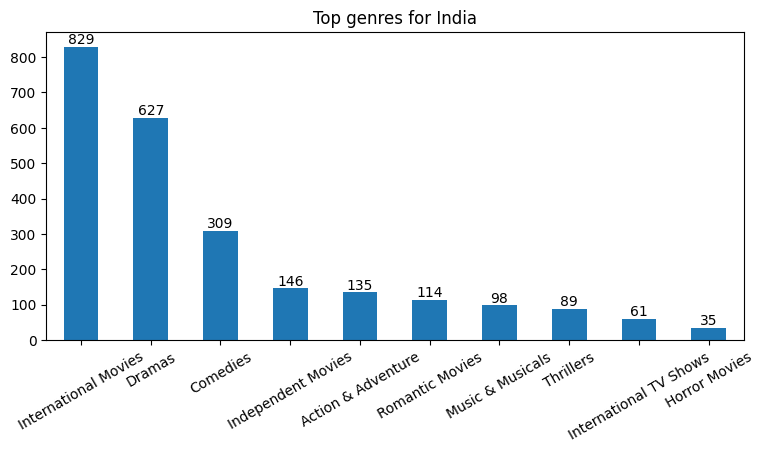

<Figure size 640x480 with 0 Axes>

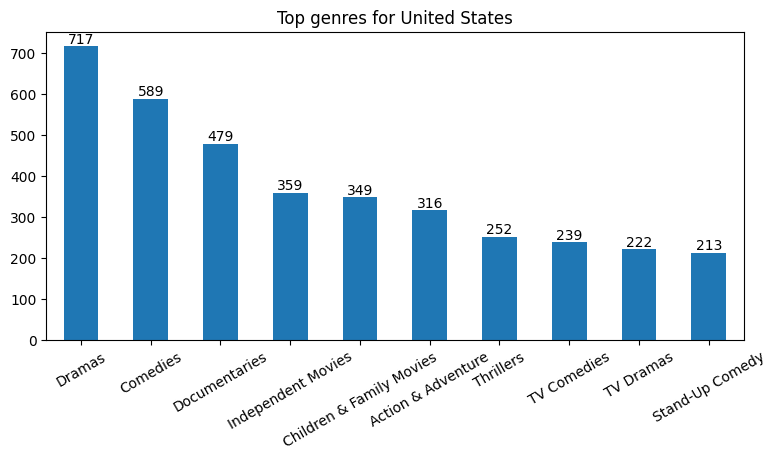

<Figure size 640x480 with 0 Axes>

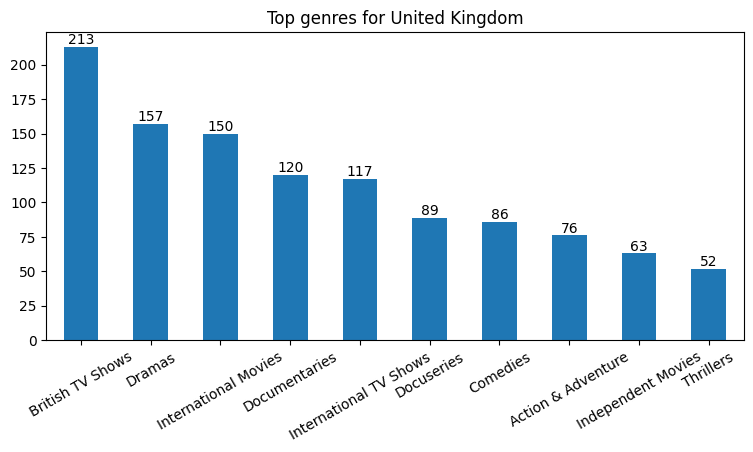

In [ ]:
# Chart - 7 visualization code
i=0
title=['for India',
       'for United States',
       'for United Kingdom']
for x_df in [India_genre_df,US_genre_df,UK_genre_df]:
    plt.figure()
    ax=x_df.iloc[:10].plot(kind='bar',figsize=(9,4));
    ax.get_legend().remove()
    plt.xticks(rotation=30)
    plt.title(f'Top genres {title[i]}')
    i+=1
    for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

Same as above, from a bar chart, we can see which groups are highest or most common, and how other groups compare against the others which in this case is genres by top countries.

##### 2. What is/are the insight(s) found from the chart?

**Top genres for**

*   **India**: *International Movies*(829), *Dramas*(627) and third being *Comedies*(309)
*   **United States**: *Dramas*(717), *Comedies*(589) and third being Documenteries(479)
*   **United Kingdom**: *British TV Shows*(213), *Dramas*(157) and third being *International Movies*(150)




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Cluster can have features with values of these countries and particular genres as certain patterns.

#### Chart - 8: Genre For TV-Shows by countries



<Figure size 640x480 with 0 Axes>

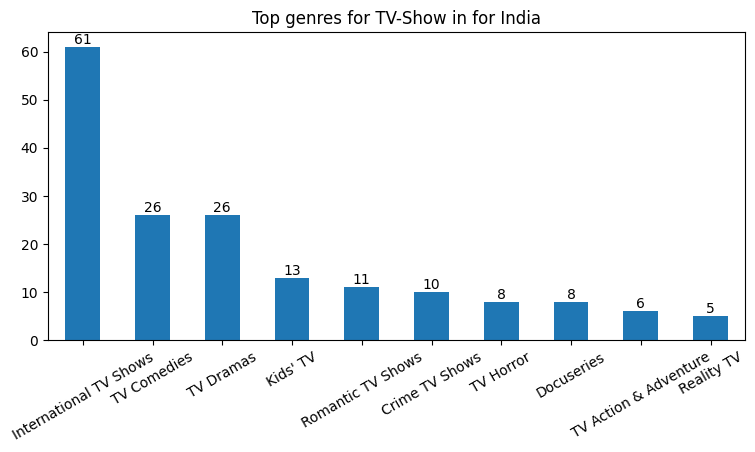

<Figure size 640x480 with 0 Axes>

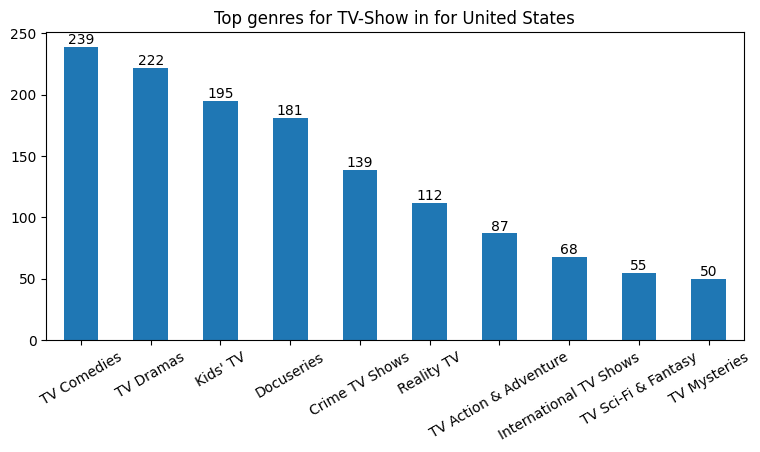

<Figure size 640x480 with 0 Axes>

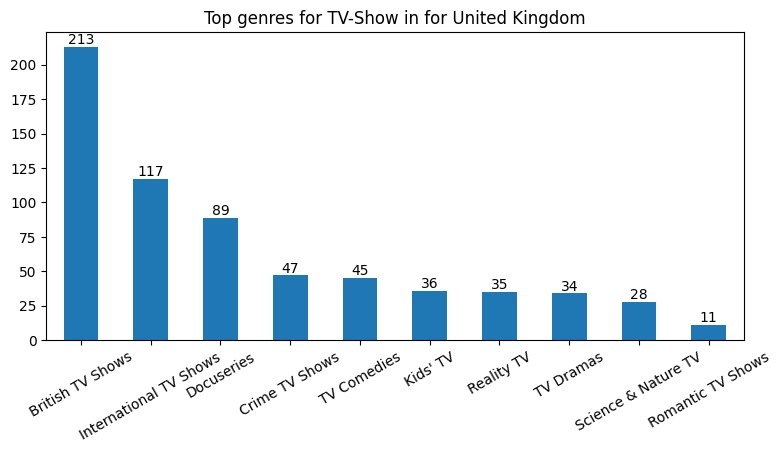

In [ ]:
# Chart - 8 visualization code
i=0
title=['for India',
       'for United States',
       'for United Kingdom']
for x_df in [India_tv_genre,US_tv_genre,UK_tv_genre]:
    plt.figure()
    ax=x_df.iloc[:10].plot(kind='bar',figsize=(9,4));
    ax.get_legend().remove()
    plt.xticks(rotation=30)
    plt.title(f'Top genres for TV-Show in {title[i]}')
    i+=1
    for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

Above 3 charts compares counts of geners of TV Shows type of content for top three countries which is easily compared by bar charts.

##### 2. What is/are the insight(s) found from the chart?

**Top genres for TV Shows :**

*   **India**: *International TV Shows*(61), *TV Comedies*(26) and third being *TV Drama*(26)
*   **United States**: *TV Comedies*(239), *TV Drama*(222) and third being *kid's TV*(195)
*   **United Kingdom**: *British TV Shows*(213), *International TV Shows*(117) and third being *Docuseries*(89)




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see patterns for clusters by countries or by genres and TV Show type

#### Chart - 9: Genres for Movies by Countries

<Figure size 800x550 with 0 Axes>

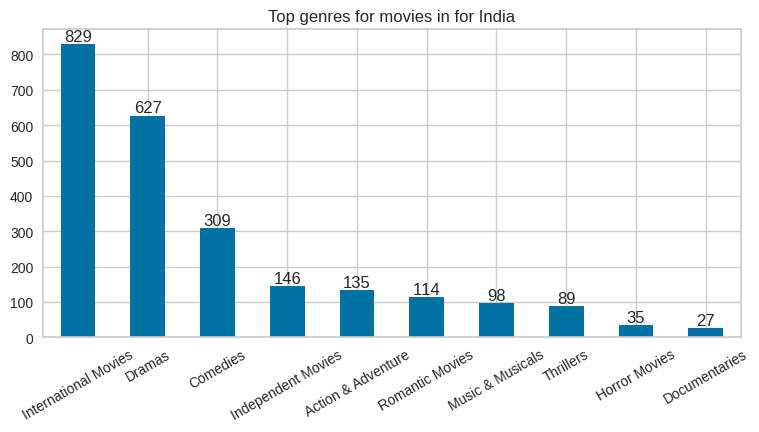

<Figure size 800x550 with 0 Axes>

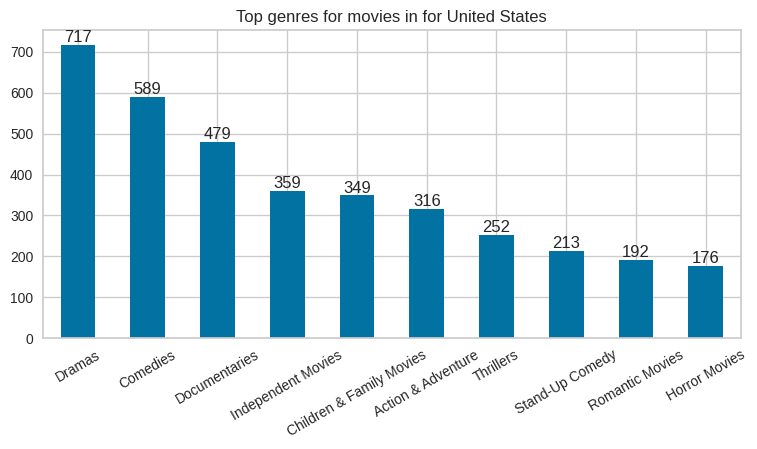

<Figure size 800x550 with 0 Axes>

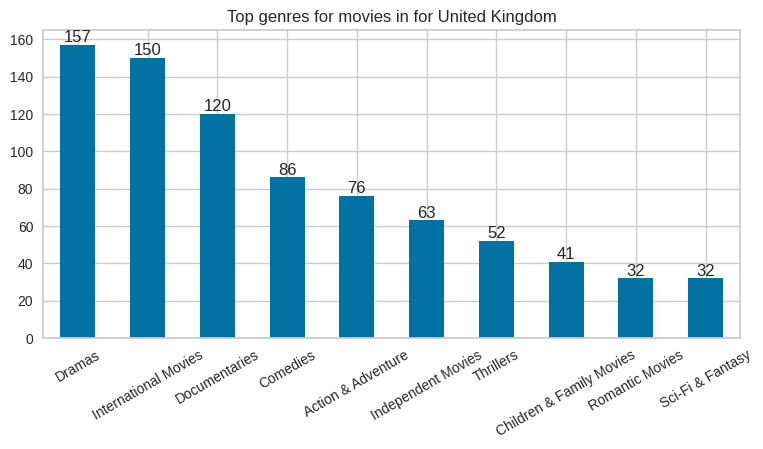

In [ ]:
# Chart - 9 visualization code
i=0
title=['for India',
       'for United States',
       'for United Kingdom']
for x_df in [India_movie_genre,US_movie_genre,UK_movie_genre]:
    plt.figure()
    ax=x_df.iloc[:10].plot(kind='bar',figsize=(9,4));
    ax.get_legend().remove()
    plt.xticks(rotation=30)
    plt.title(f'Top genres for movies in {title[i]}')
    i+=1
    for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

Above 3 charts compares counts of geners of Movies type of content for top three countries which is easily compared by bar charts.

##### 2. What is/are the insight(s) found from the chart?

**Top genres for**

*   **India**: *International Movies*(829), *Dramas*(627) and third being *Comedies*(309)
*   **United States**: *Dramas*(717), *Comedies*(589) and third being *Documenteries*(479)
*   **United Kingdom**: *British TV Shows*(157), *Dramas*(150) and third being *International Movies*(120)




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see patterns for clusters by countries or by genres and Movies type

#### Chart - 10: Types by countries

<Figure size 640x480 with 0 Axes>

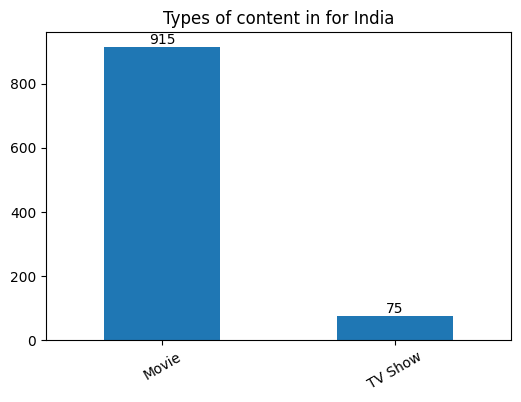

<Figure size 640x480 with 0 Axes>

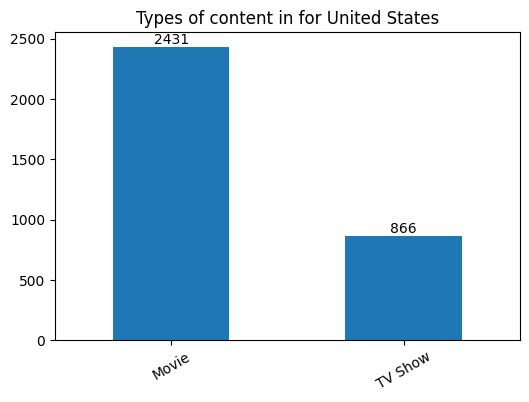

<Figure size 640x480 with 0 Axes>

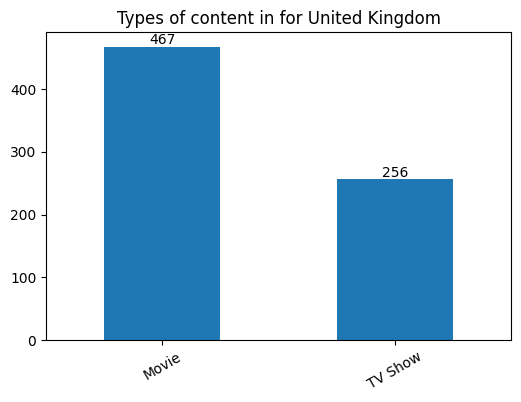

In [ ]:
# Chart - 10 visualization code
i=0
title=['for India',
       'for United States',
       'for United Kingdom']
for x_df in [India_types,US_types,UK_types]:
    plt.figure()
    ax=x_df.plot(kind='bar',figsize=(6,4));
    ax.get_legend().remove()
    plt.xticks(rotation=30)
    plt.title(f'Types of content in {title[i]}')
    i+=1
    for bar in ax.patches:
      ax.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x() +bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

Bar charts are good and easy way of comparing categorical data.
In the above charts we compare type of content count for Top countries.

##### 2. What is/are the insight(s) found from the chart?

**For**

**India** : Movies(915) and TV Shows(75)

**United States**: Movies(2431) and TV Shows(866)

**United Kingdom**: Movies(467) and TV Shows(256)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Cluster pattern can be seen if clusters these features have big contribution in clustering

#### Chart - 11 Years of release

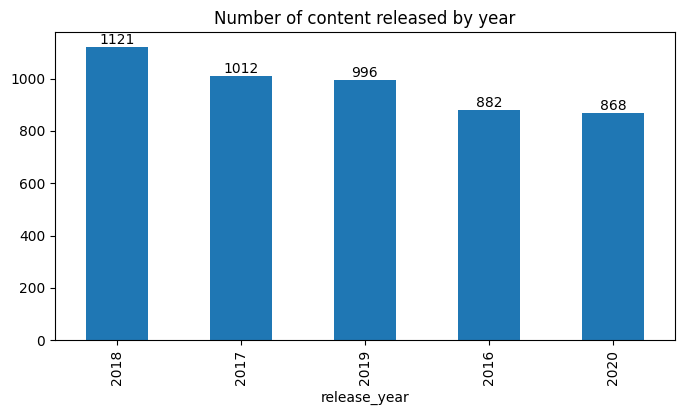

In [ ]:
# Chart - 11 visualization code
ax=top_year.plot(kind='bar',figsize=(8,4))
plt.title('Number of content released by year')
ax.get_legend().remove()
for bar in ax.patches:
  plt.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');

##### 1. Why did you pick the specific chart?

Bar charts provide good comparison. Here we compare top years for number of content released.

##### 2. What is/are the insight(s) found from the chart?

**Top years for number of content released are :**

2018--(1121)

2017--(1012)

2019--(996)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For clustering to have effect of years, this chart shows some of the pattern

#### Chart - 12: TV-Show released by years and countries

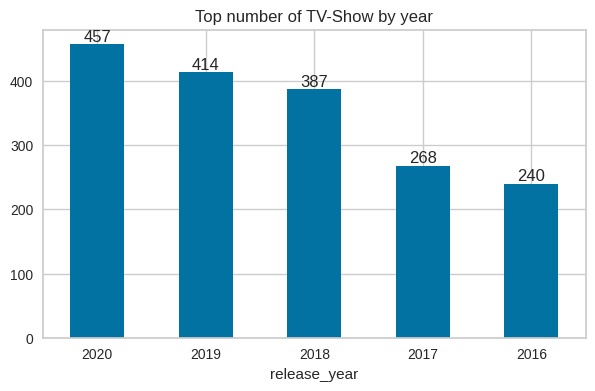

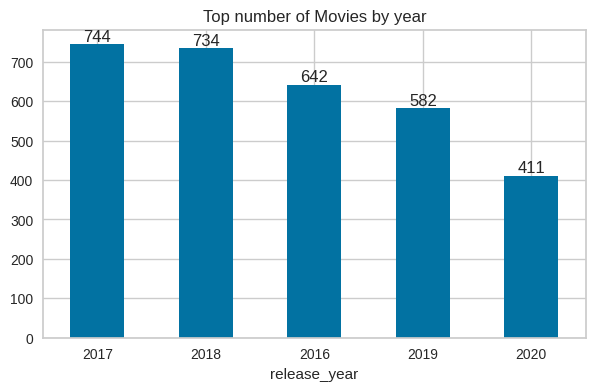

In [ ]:
# Chart - 12 visualization code
i=0
title=['TV-Show','Movies']
for x_df in [top_year_tv,top_year_movie]:
    ax=x_df.plot(kind='bar',figsize=(7,4))
    plt.xticks(rotation=0)
    ax.get_legend().remove()
    for bar in ax.patches:
      plt.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');
    plt.title(f'Top number of {title[i]} by year')
    i+=1

##### 1. Why did you pick the specific chart?

Similarly as chart before, above bar chart compares amount of content released by years for TV Show type and Movies type

##### 2. What is/are the insight(s) found from the chart?

**For TV Shows Top years are :**

2020--(457)

2019--(414)

2018--(387)

**For Movies type Top years are :**

2017--(744)

2018--(734)

2016--(642)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The number of Movie content is decreasing by the years whereas TV shows are getting more and more popular.

#### Chart - 13 : Top years by Countries

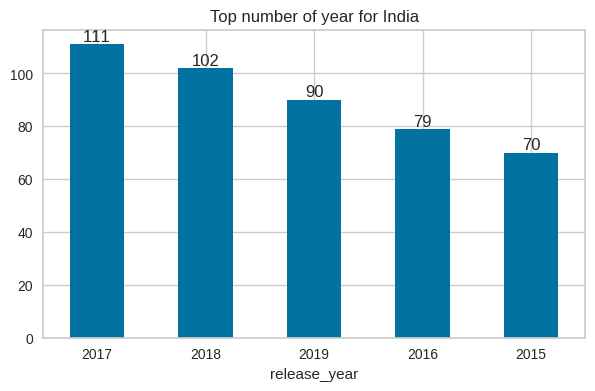

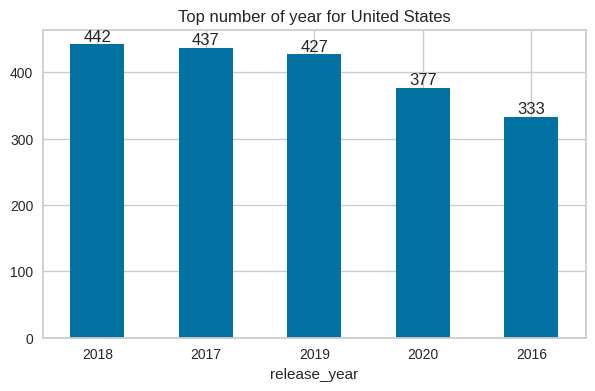

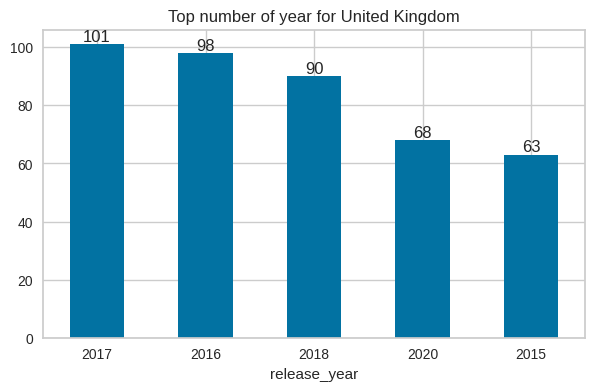

In [51]:
# Chart - 13 visualization code
i=0
title=['India','United States','United Kingdom']
for x_df in [top_year_india,top_year_us,top_year_uk]:
    ax=x_df.plot(kind='bar',figsize=(7,4))
    plt.xticks(rotation=0)
    ax.get_legend().remove()
    for bar in ax.patches:
      plt.annotate('{:.0f}'.format(bar.get_height()),(bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='bottom');
    plt.title(f'Top number of year for {title[i]}')
    i=i+1

##### 1. Why did you pick the specific chart?

Similarly as chart before, above bar chart compares amount of content released by years top countries.

##### 2. What is/are the insight(s) found from the chart?

Top Years are as follows:

**India** : 2017

**United States** : 2018

**United Kingdom** : 2017

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We see gradual increase till years 2017-18 and then a slight drop in overall content.

#### Chart - 14 - Correlation Heatmap

<Axes: >

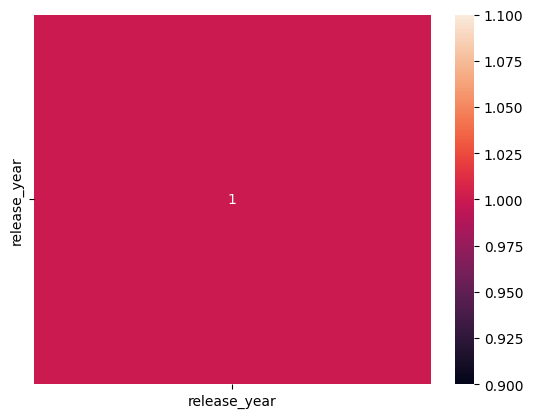

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(),annot=True)

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis.

##### 2. What is/are the insight(s) found from the chart?

The data only cotnains release year as a numeric variable and hence heatmap does not describe any information on correlation between variables in categorical form.

#### Chart - 15 - Pair Plot

<Figure size 2000x1200 with 0 Axes>

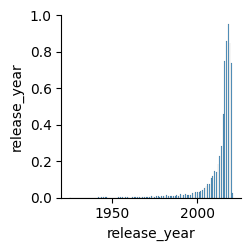

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(20,12))
sns.pairplot(df);

##### 1. Why did you pick the specific chart?

A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one numeric variable, it only shows distribution of  amount of content released by year

## *** Feature Engineering & Data Pre-processing***

###  Handling Missing Values

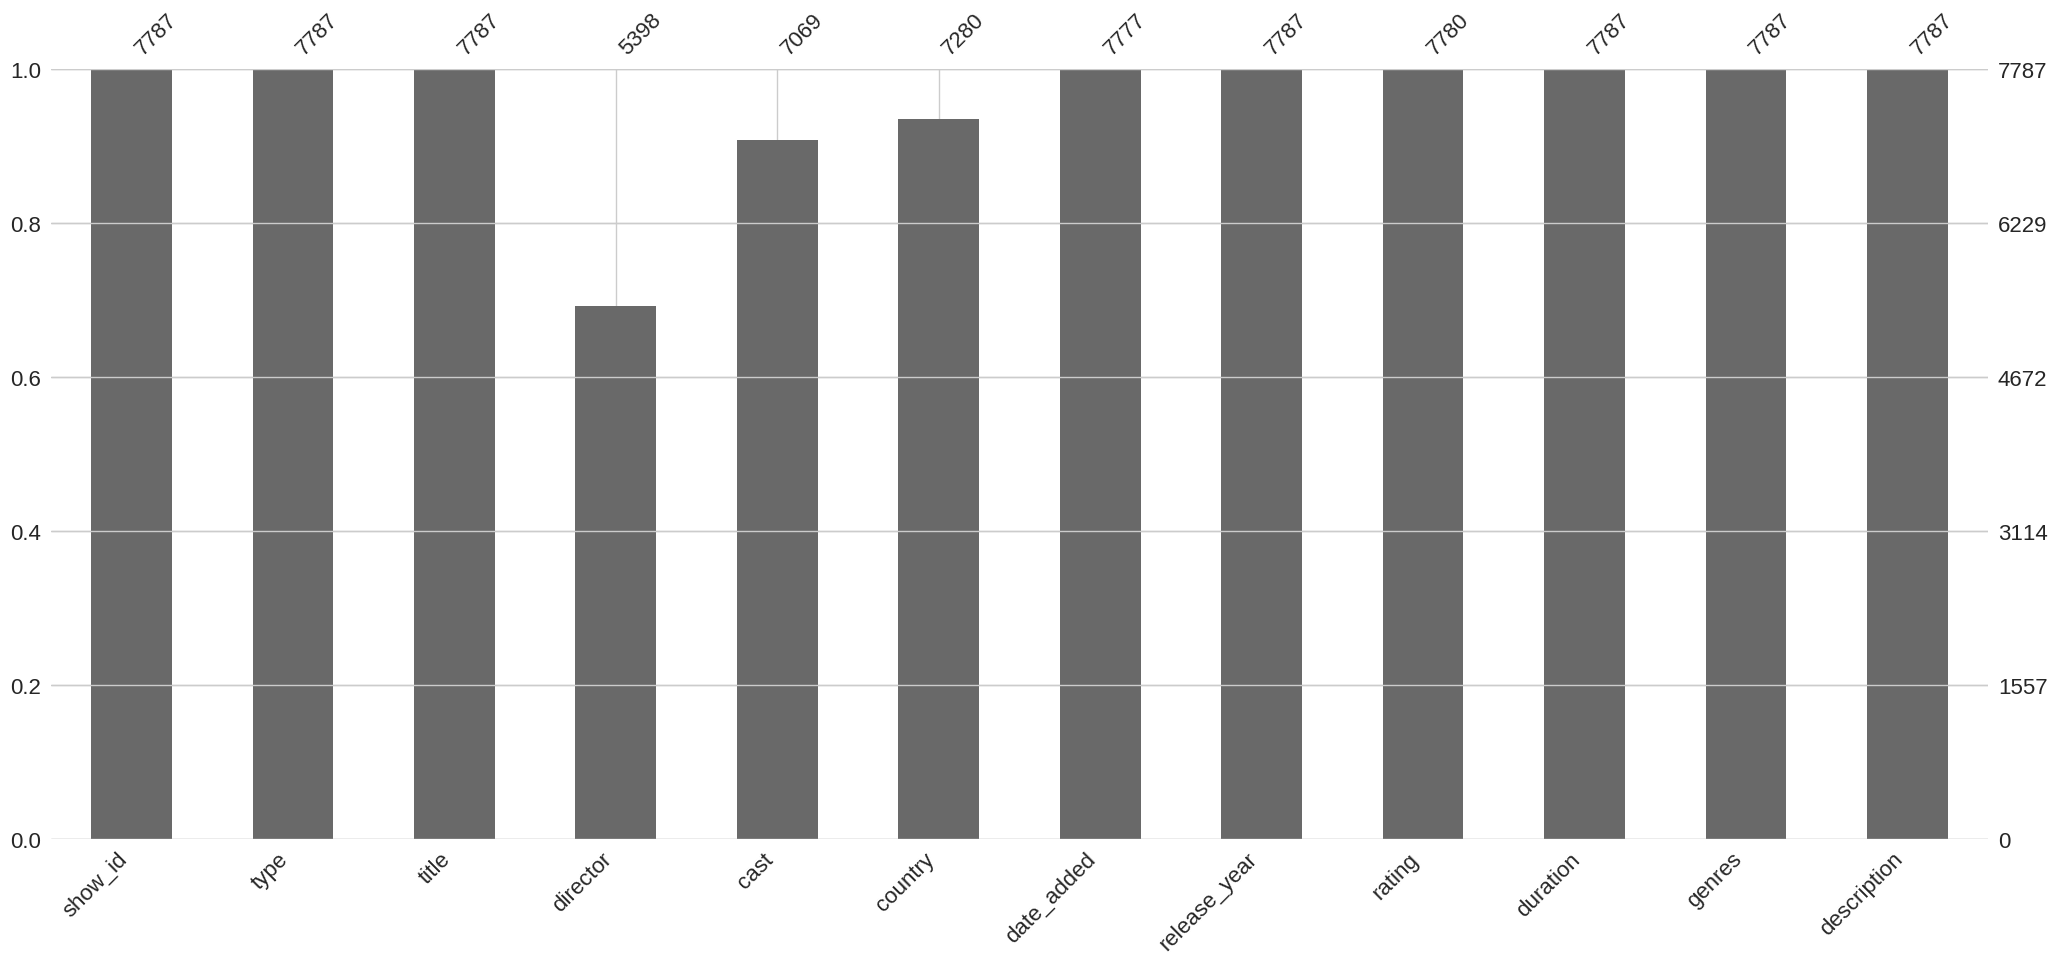

In [120]:
# Handling Missing Values & Missing Value Imputation
msno.bar(df);

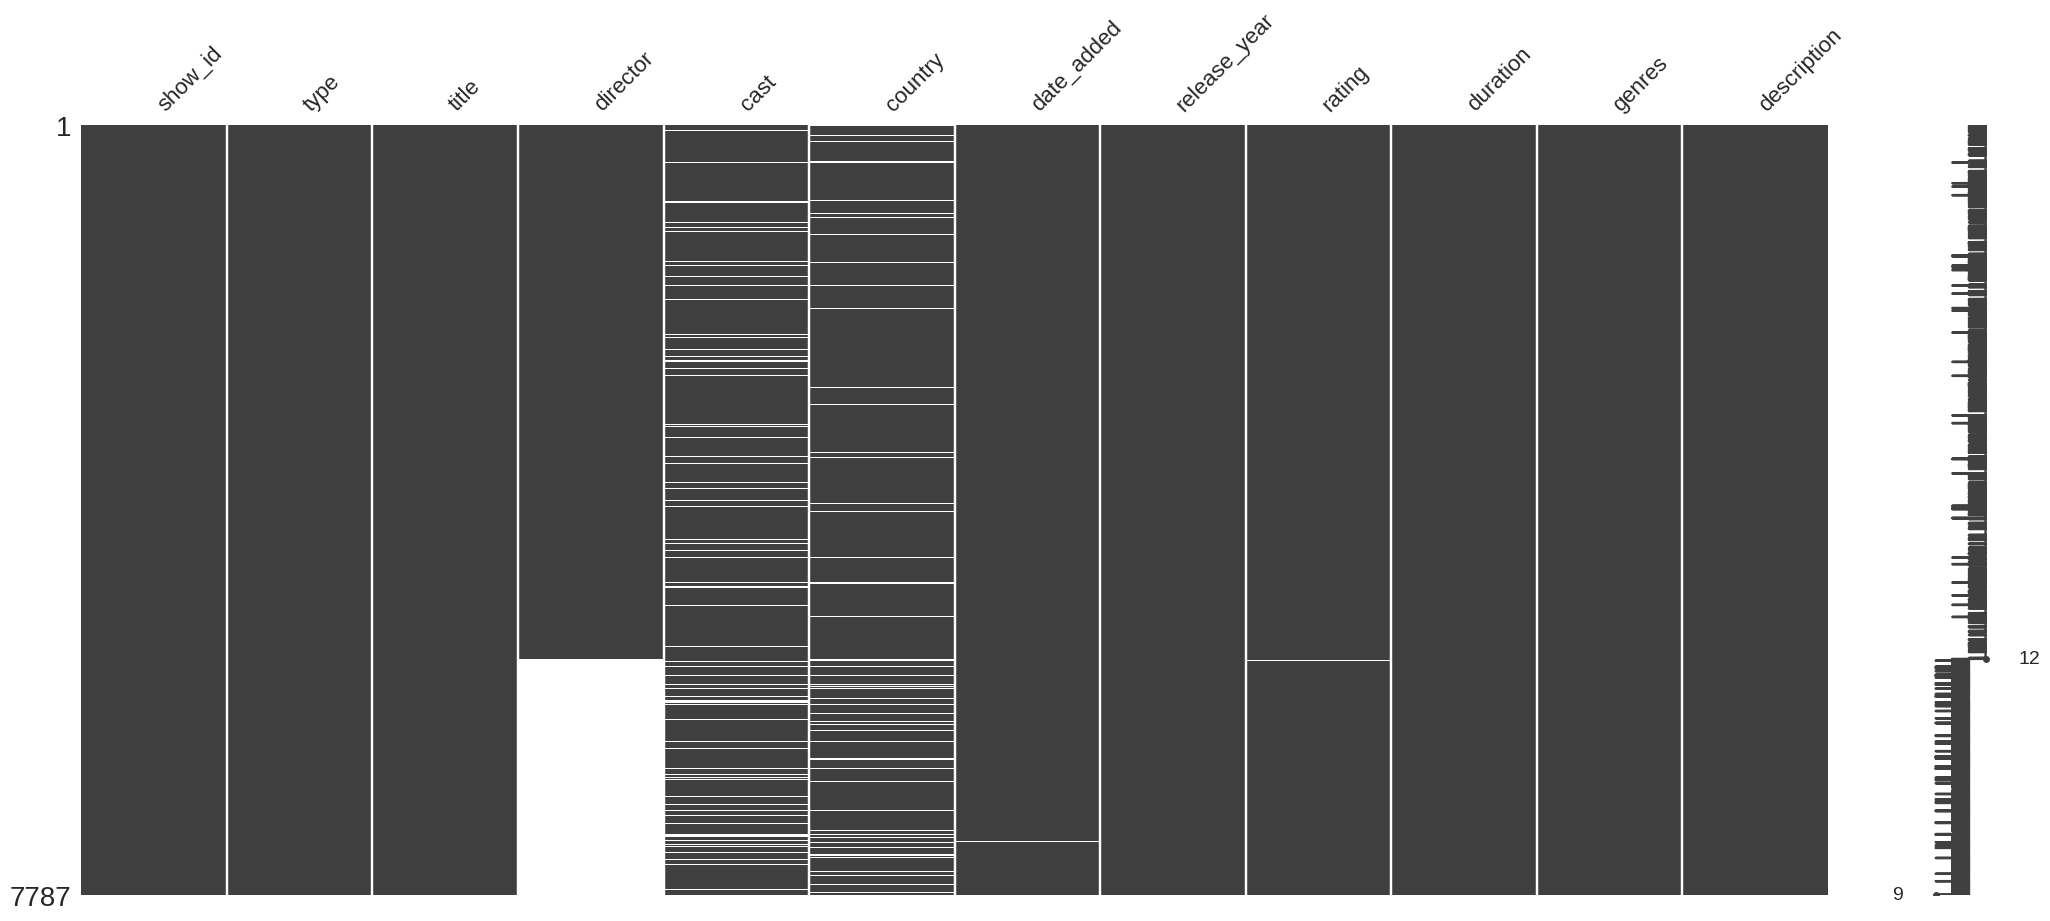

In [121]:
msno.matrix(df.sort_values('director'));

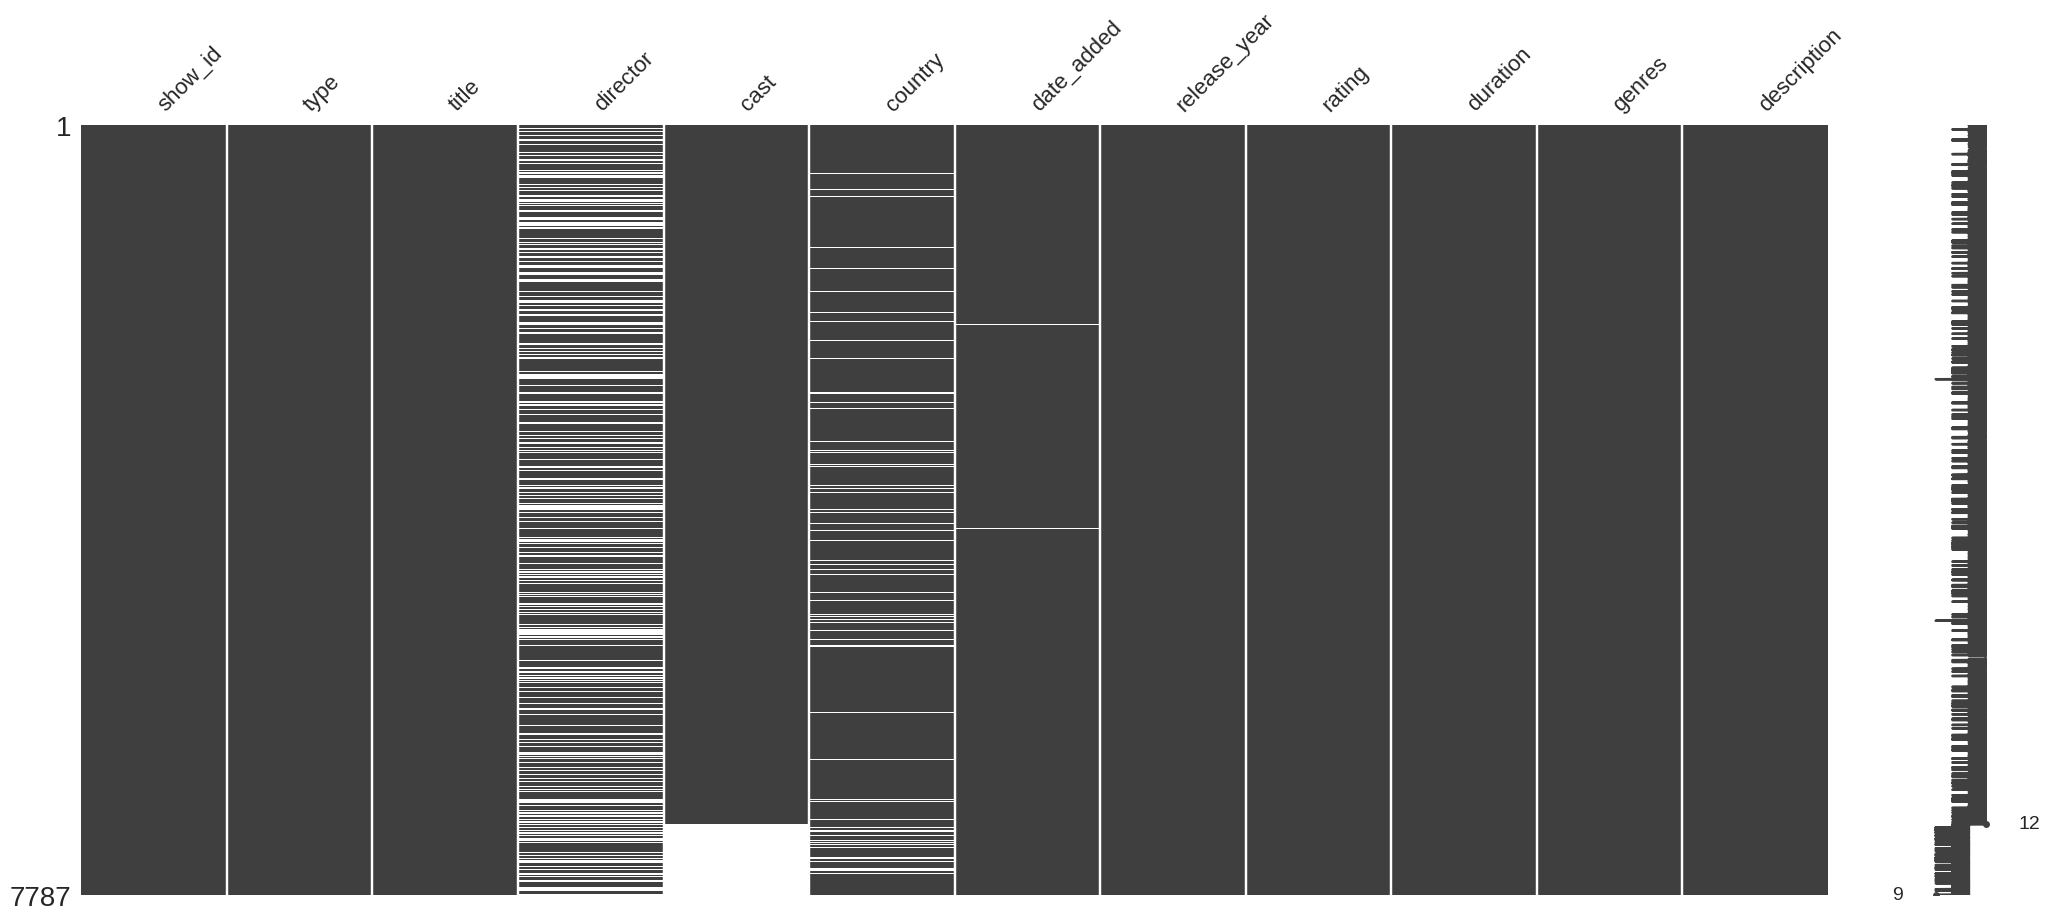

In [122]:
msno.matrix(df.sort_values('cast'));

<Axes: >

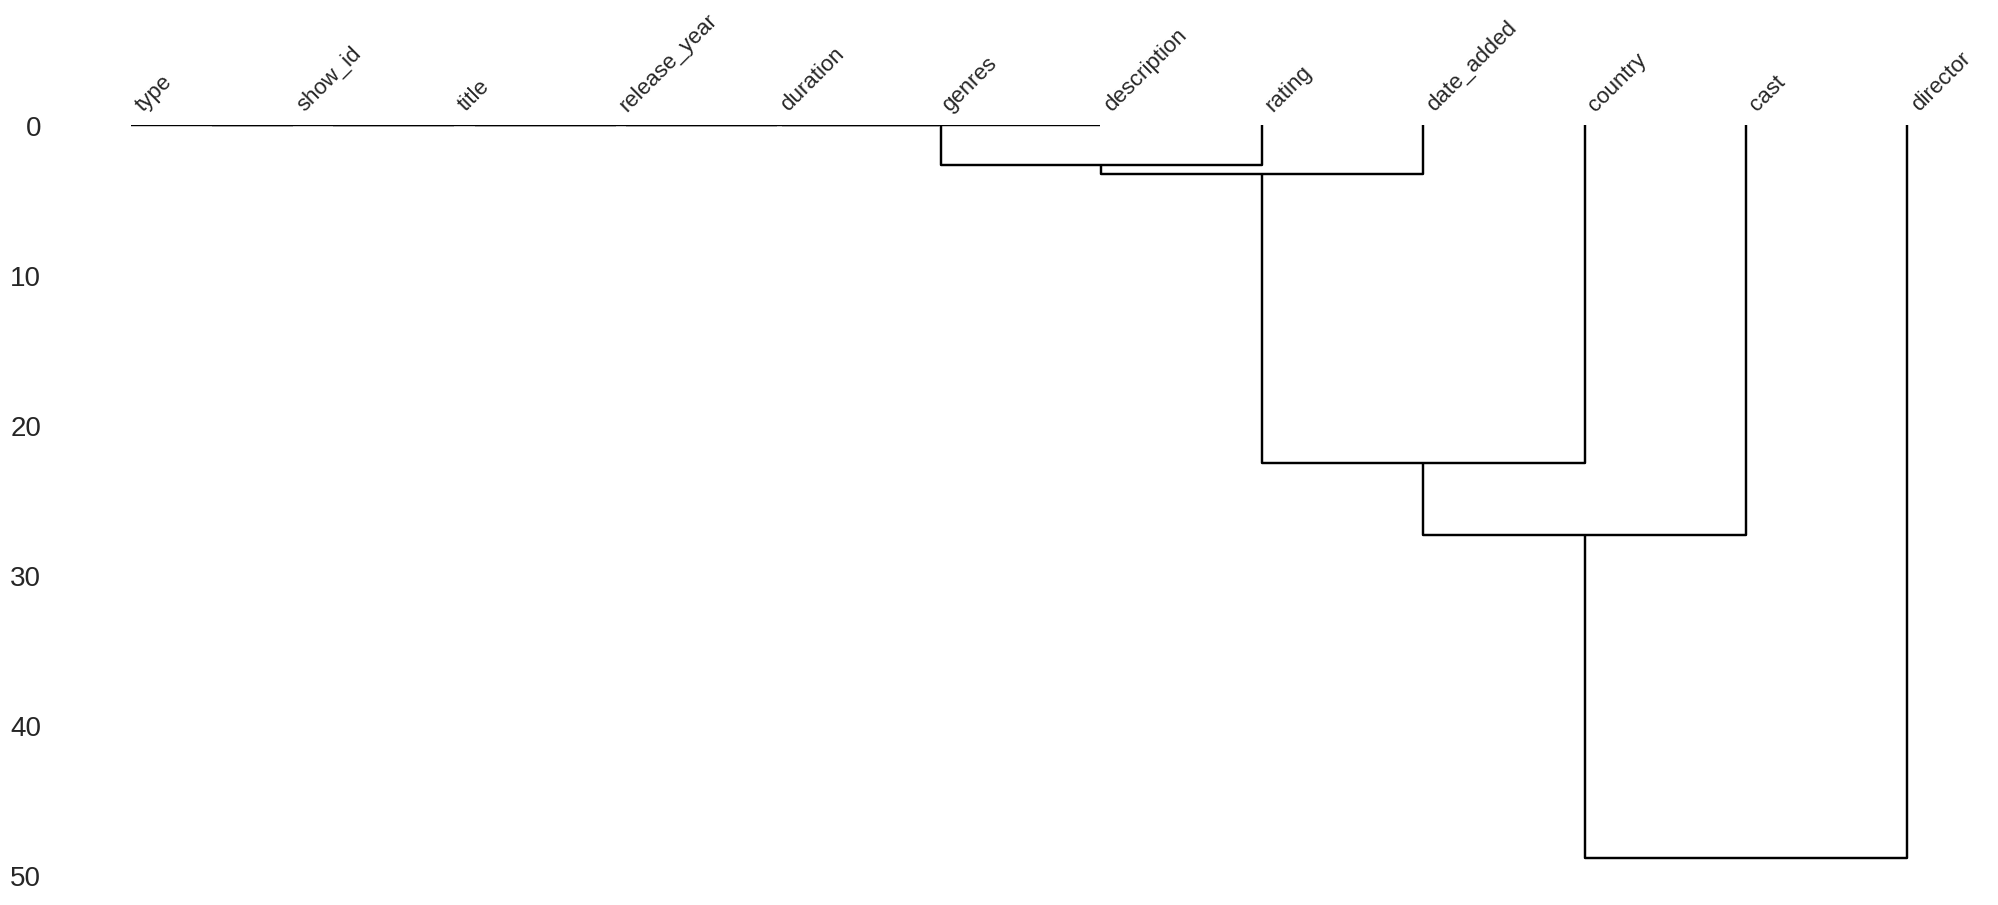

In [123]:
#dendrogram to show correlation between missing values in the data
msno.dendrogram(df)

In [153]:
#imputing missing values in cast,country as unknown as generally seen in most websites
df['date_added'].fillna('backfill',inplace=True)
df.fillna('Unknown',inplace=True)

In [125]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

###  Categorical Encoding

In [126]:
# a look before creating and encoding feature
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [154]:
# Creating feature to combine all the feature and then encode your categorical columns
df['clustered']=''
df['clustered']+=df['title']+' '+df['rating']+' '+df['description']+' '+df['country']+' '+df['cast']+' '+df['genres']+' '+df['type']

In [155]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                           clustered  
0  3% TV-MA In a future where the elite inhabit a...  
1  7:19 TV-MA After a devastating earthquake hits...  
2  23:59 R When an army recruit is found dead, hi...  
3  9 PG-13 In a postapocalyptic world, rag-doll r...  
4  21 PG-13 A brilliant group of students become ...

#### What all categorical encoding techniques have you used & why did you use those techniques?

We have created a column to combine all the textual data to do preprocessing

### 4. Textual Data Preprocessing

####  Expand Contraction

In [100]:
#libraries for natural language processing to process through textual data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [156]:
# Expand Contraction
df['clustered']=df['clustered'].apply(lambda x: contractions.fix(x))

####  Lower Casing

In [157]:
# Lower Casing
df['clustered']=df['clustered'].apply(lambda x: x.lower())

####  Removing Punctuations

In [158]:
# Remove Punctuations
def remove_puncs(x):
  '''Function to remove punctuations from text'''
  #replacing punctuations by no space
  translator=str.maketrans('','',string.punctuation)
  #returning stripped text
  return x.translate(translator)

df['clustered']=df['clustered'].apply(lambda x: remove_puncs(x))

####  Removing URLs & Removing words and digits contain digits.

In [159]:
# Remove URLs & Remove words and digits contain digits
from urllib.parse import urlparse

def remove_urls(text):
    '''To remove urls from the text'''
    words = text.split()
    for i, word in enumerate(words):
        parsed_url = urlparse(word)
        if parsed_url.scheme and parsed_url.netloc:
            words[i] = ''
    return ' '.join(words)
def remove_special_chars(text):
    '''To remove special characters or anything other than alphabet'''
    normal_string="".join(ch for ch in text if ((ch.isalpha()) or (ch==' ')))
    return normal_string
#removing urls
df['clustered']=df['clustered'].apply(lambda x: remove_urls(x))
#removing non alphabet characters
df['clustered']=df['clustered'].apply(lambda x: remove_special_chars(x))


####  Removing Stopwords & Removing White spaces

In [160]:
#extracting stopwords from library
sw=stopwords.words('english')
#displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [161]:
# Remove Stopwords

def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

#removing stopwords
df['clustered']=df['clustered'].apply(lambda x: remove_stopwords(x))

In [162]:
# Remove White spaces

def remove_whitespaces(text):
    '''to remove whitespaces'''
    return " ".join(text.split())

#removing white spaces

df['clustered']=df['clustered'].apply(lambda x: remove_whitespaces(x))

####  Text Normalization

In [163]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer=WordNetLemmatizer()
def lemmatize(text):
    '''a function which stems each word in the given text'''
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(text)

df['clustered']=df['clustered'].apply(lambda x: lemmatize(x))

##### Which text normalization technique have you used and why?

We have used WordNetLemmatizer. It converts the words to its base word

####  Text Vectorization

In [164]:
# Vectorizing Text
tfidf=TfidfVectorizer(max_features=20000)
X=tfidf.fit_transform(df['clustered'])

In [165]:
#shape of the transformed matrix
print('Shape of the transformed matrix \nX.shape: ',X.shape)

Shape of the transformed matrix 
X.shape:  (7787, 20000)


In [139]:
print('feature names: ')
tfidf.get_feature_names_out()

feature names: 


array(['aakash', 'aamir', 'aaron', ..., 'şafak', 'şahin', 'şinasi'],
      dtype=object)

In [140]:
print('vocabulary : ')
tfidf.vocabulary_

vocabulary : 


{'tvma': 18612,
 'future': 5922,
 'elite': 4684,
 'inhabit': 7745,
 'island': 7964,
 'paradise': 13306,
 'far': 5371,
 'crowded': 3530,
 'slum': 16884,
 'get': 6094,
 'one': 12932,
 'chance': 2654,
 'join': 8430,
 'saved': 16034,
 'brazil': 2081,
 'joão': 8517,
 'miguel': 11435,
 'bianca': 1704,
 'comparato': 3100,
 'michel': 11394,
 'rodolfo': 15381,
 'oliveira': 12893,
 'rafael': 14498,
 'lozano': 10239,
 'porto': 13987,
 'mel': 11227,
 'sergio': 16380,
 'celso': 2597,
 'international': 7831,
 'tv': 18610,
 'show': 16692,
 'drama': 4402,
 'scifi': 16149,
 'fantasy': 5368,
 'devastating': 4027,
 'earthquake': 4539,
 'hit': 7119,
 'mexico': 11374,
 'city': 2903,
 'trapped': 18467,
 'survivor': 17634,
 'walk': 19178,
 'life': 9913,
 'wait': 19164,
 'rescued': 15044,
 'trying': 18561,
 'desperately': 3998,
 'stay': 17278,
 'alive': 421,
 'demián': 3929,
 'bichir': 1710,
 'héctor': 7459,
 'bonilla': 1907,
 'oscar': 13058,
 'serrano': 16397,
 'ortiz': 13050,
 'carmen': 2487,
 'beato': 1506

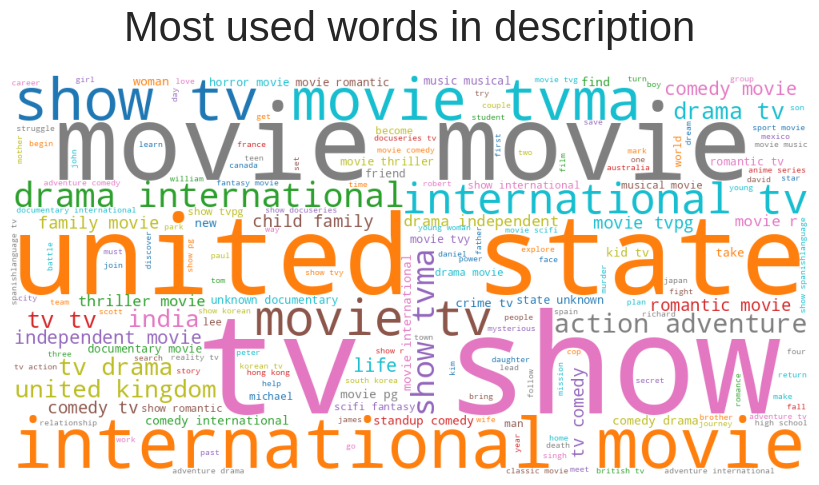

In [ ]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(sw)

# iterate through the column.
for val in df.clustered:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'tab10').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

We have veectorized the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

TF-IDF is particularly useful in NLP tasks, topic modeling, and machine learning tasks. It helps algorithms to use the importance of the words to predict outcomes.

**Term Frequency (TF)**

t is the ratio of the occurrence of the word (w) in document (d) per the total number of words in the documents. With this simple formulation, we are measuring the frequency of a word in the document.

***tf(w,d) = occurence of w in document d / total number of words in document d***


**Inverse Document Frequency (IDF)**

IDF calculates the importance of a word in a corpus D. The most frequently used words like “of, we, are” have little to no significance. It is calculated by dividing the total number of documents in the corpus by the number of documents containing the word.

***idf(w,D) = ln(total number of documents(N) in corpus D / number of documents containing w)***

**Term Frequency Inverse Document Frequency (TFIDF)**


TF-IDF is the product of term frequency and inverse document frequency. It gives more importance to the word that is rare in the corpus and common in a document.

**tfidf(w,d,D) = tf(w,d) * idf(w,D)**

###  Dimesionality Reduction

After converting the corpus to a tfidf matrix, the shape of the matrix has 20000 features and has very high dimensionality. It will result in very high computational cost. We have to dimensionality reduction.

In [ ]:
# Dimensionality Reduction (If needed)
pca=PCA()
pca.fit(X.toarray())

PCA()

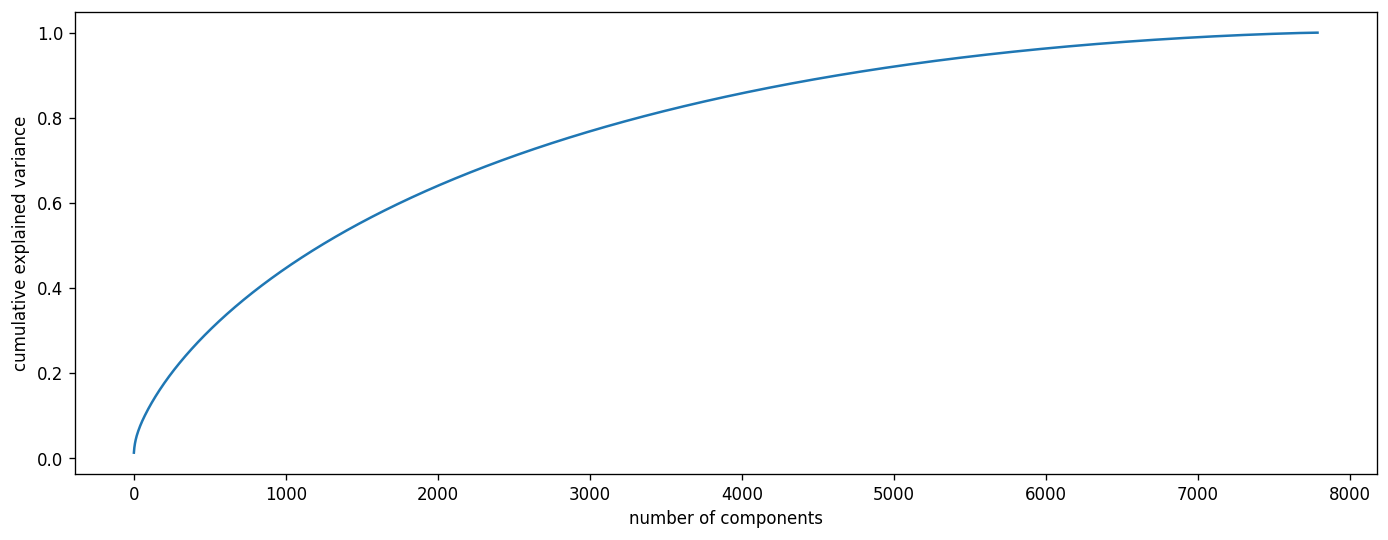

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#features that explain 95% of the data
pca_tuned=PCA(n_components=.95)
pca_tuned.fit(X.toarray())
X_transformed=pca_tuned.transform(X.toarray())

In [ ]:
#shape of the transformed data after applying the PCA
X_transformed.shape

(7787, 5711)

In [ ]:
# a look at the transformed matrix
X_transformed

array([[ 0.13398089, -0.02959545, -0.02110526, ..., -0.0043289 ,
         0.0029553 , -0.01410924],
       [-0.0623685 , -0.03336276,  0.00793958, ..., -0.00053012,
         0.0033714 ,  0.01136269],
       [-0.06491914, -0.04953077, -0.01715457, ...,  0.0065096 ,
         0.00183151, -0.01327518],
       ...,
       [-0.06772383,  0.05040767,  0.16722037, ...,  0.00299944,
        -0.0185577 ,  0.00201865],
       [ 0.12116204, -0.00438159,  0.01241183, ..., -0.00240631,
        -0.00610511,  0.00785302],
       [-0.07853766,  0.20287988,  0.22674164, ...,  0.00093109,
         0.00683646,  0.00161227]])

In [66]:
import pickle

In [ ]:
pickle.dump(X_transformed,open('transs.pkl','wb'))

In [ ]:
# save pipe.pkl to output data folder
!cp transs.pkl /content/drive/MyDrive/saved

In [67]:
X_transformed=pickle.load(open('/content/drive/MyDrive/saved/transs.pkl','rb'))

In [ ]:
X_transformed

array([[ 0.13398089, -0.02959545, -0.02110526, ..., -0.0043289 ,
         0.0029553 , -0.01410924],
       [-0.0623685 , -0.03336276,  0.00793958, ..., -0.00053012,
         0.0033714 ,  0.01136269],
       [-0.06491914, -0.04953077, -0.01715457, ...,  0.0065096 ,
         0.00183151, -0.01327518],
       ...,
       [-0.06772383,  0.05040767,  0.16722037, ...,  0.00299944,
        -0.0185577 ,  0.00201865],
       [ 0.12116204, -0.00438159,  0.01241183, ..., -0.00240631,
        -0.00610511,  0.00785302],
       [-0.07853766,  0.20287988,  0.22674164, ...,  0.00093109,
         0.00683646,  0.00161227]])

PCA reduces the number of variables or features in a data set while still preserving the most important information like major trends or patterns.

As we can see 100% of variance is explained by around 20000 features while around 95% of the variance is explained by only 5500 features and helps reduce dimensionality.


## ***ML Model Implementation***

### ML Model - KMeans CLustering

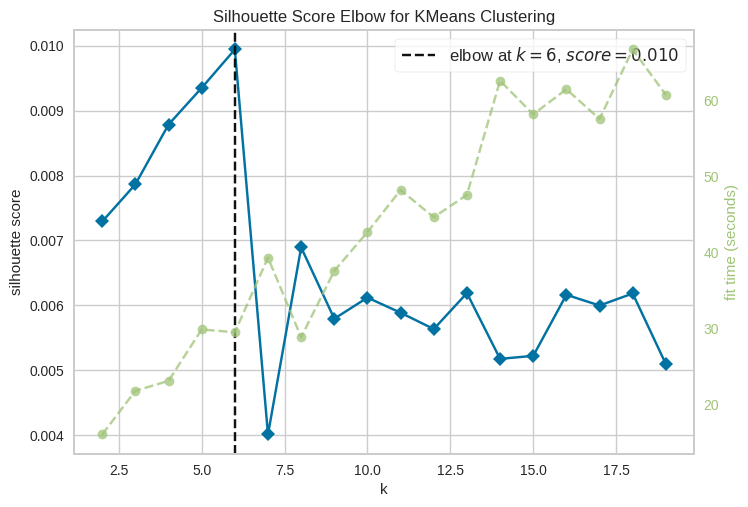

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# ML Model - 1 Implementation

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')

# Fit the Algorithm
visualizer.fit(X_transformed)

# Predict on the model
visualizer.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#best kmeans models by elbow method have 6 clusters
best_model_kmeans_silhouette=KMeans(n_clusters=6,random_state=5)
#fitting the data
best_model_kmeans_silhouette.fit(X_transformed)
#predicting the clusters
best_model_kmeans_silhouette.labels_

array([0, 4, 4, ..., 3, 0, 3], dtype=int32)

In [ ]:
#labels for default kmeans cluster settings
df['labels_KMeans_silhouette']=best_model_kmeans_silhouette.predict(X_transformed)
df

show_id     type           director  \
0         s1  TV Show            Unknown   
1         s2    Movie  Jorge Michel Grau   
2         s3    Movie       Gilbert Chan   
3         s4    Movie        Shane Acker   
4         s5    Movie     Robert Luketic   
...      ...      ...                ...   
7782   s7783    Movie        Josef Fares   
7783   s7784    Movie        Mozez Singh   
7784   s7785    Movie            Unknown   
7785   s7786  TV Show            Unknown   
7786   s7787    Movie           Sam Dunn   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                 ...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                            Unknown   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                            Unknown  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                                 genres  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  \
0     In a future where the elite inhabit an island ...   
1     After a devastating earthquake hits Mexico Cit...   
2     When an army recruit is found dead, his fellow...   
3     In a postapocalyptic world, rag-doll robots hi...   
4     A brilliant group of students become card-coun...   
...                                                 ...   
7782  When Lebanon's Civil War deprives Zozo of his ...   
7783  A scrappy but poor boy worms his way into a ty...   
7784  In this documentary, South African rapper Nast...   
7785  Dessert wizard Adriano Zumbo loo

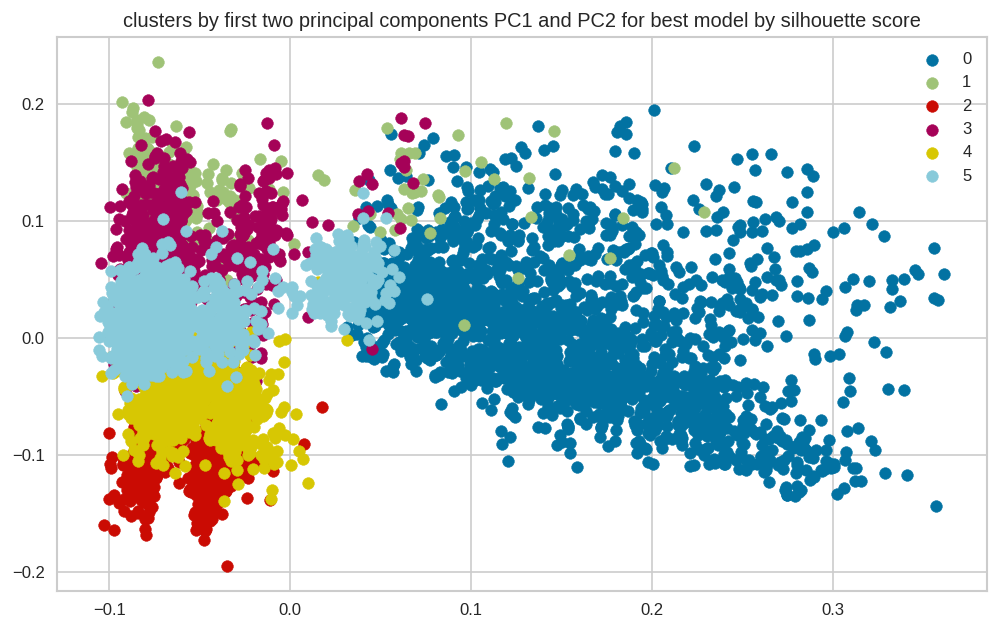

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

#predict the labels of clusters.
label = best_model_kmeans_silhouette.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
plt.title('clusters by first two principal components PC1 and PC2 for best model by silhouette score')
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

<Figure size 1200x720 with 0 Axes>

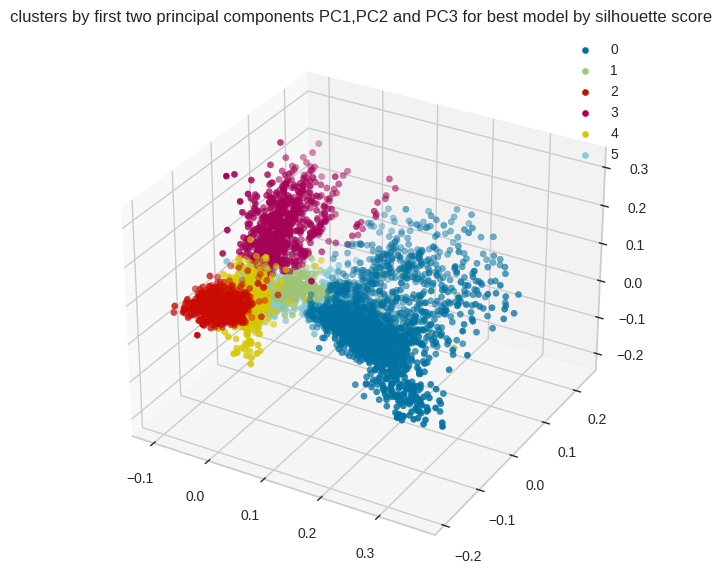

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

#predict the labels of clusters.
label = best_model_kmeans_silhouette.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection ="3d")
plt.title('clusters by first two principal components PC1,PC2 and PC3 for best model by silhouette score')
for i in unique_labels:
    ax.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1], X_transformed[label == i , 2] , label = i)
plt.legend()
plt.show()

In [ ]:
# wordcloud by 5 clusters
for j in range(6):
    # Create a string to store all the words.
    comment_words = ''

    # Remove the stopwords.
    stopwords = set(sw)

    # iterate through the column.
    for val in df2[df2['labels_KMeans_silhouette']==j]['clustered']:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1000, height = 500,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10,
                    max_words = 1000,
                    colormap = 'tab10').generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.title(f'Most used words for cluster {j} by silhouette score ', fontsize = 30, pad=25)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart for best model by silhouette score
silhouette = silhouette_score(X_transformed, best_model_kmeans_silhouette.labels_)
db_index = davies_bouldin_score(X_transformed, best_model_kmeans_silhouette.labels_)
ch_index = calinski_harabasz_score(X_transformed, best_model_kmeans_silhouette.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.009944452728634378
Davies-Bouldin Index: 11.597279827701255
Calinski-Harabasz Index: 32.384345235283085


### ML Model - 2

In [ ]:
from sklearn.cluster import MiniBatchKMeans

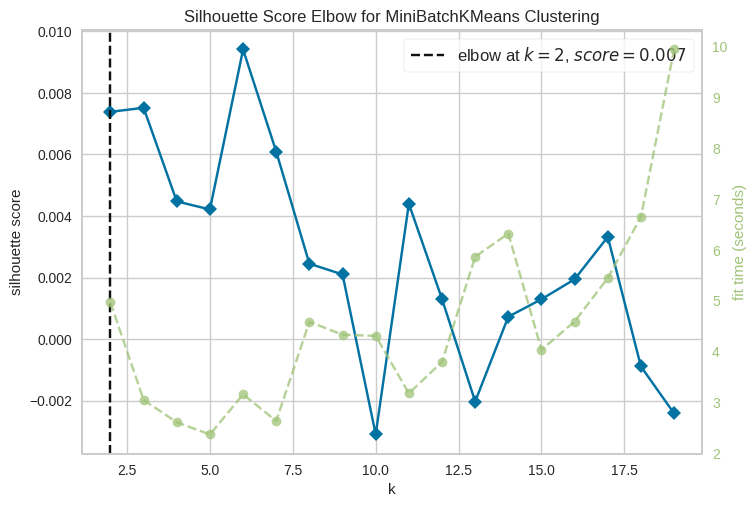

<Axes: title={'center': 'Silhouette Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# ML Model - 2 Implementation
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model_minikmeans=MiniBatchKMeans()
visualizer = KElbowVisualizer(model_minikmeans, k=(2,20), metric='silhouette')

# Fit the Algorithm
visualizer.fit(X_transformed)

# Predict on the model
visualizer.show()


In [ ]:
# creating best model by minibatchKMeans
best_miniKMeans_silhouette=MiniBatchKMeans(n_clusters=2)
#Fitting on the model
best_miniKMeans_silhouette.fit(X_transformed)


MiniBatchKMeans(n_clusters=2)

In [ ]:
df['labels_miniKMeans_silhouette']=best_miniKMeans_silhouette.labels_
df

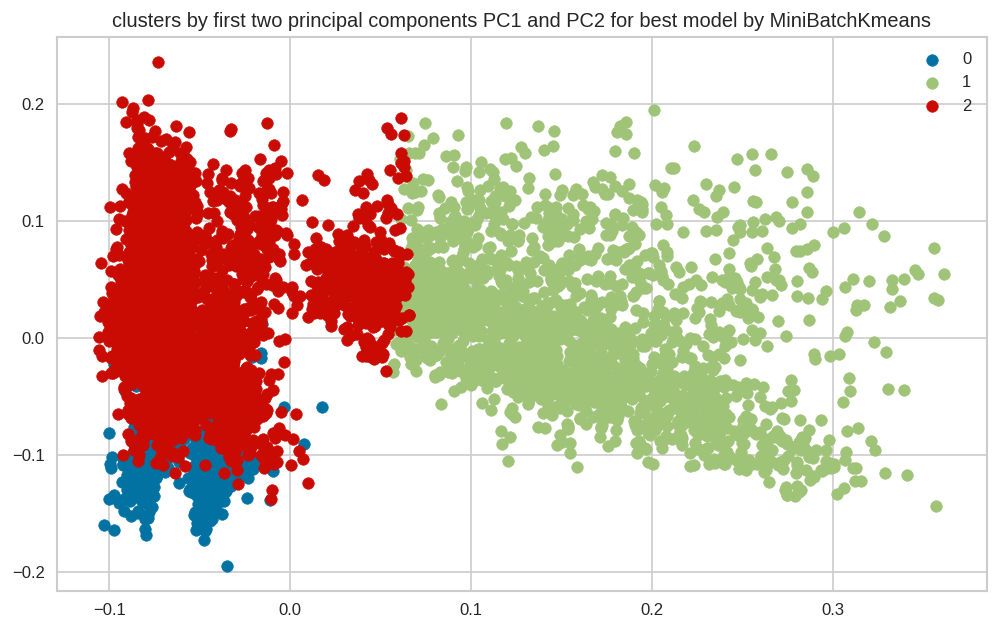

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

#predict the labels of clusters.
label =  best_miniKMeans_silhouette.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
plt.title('clusters by first two principal components PC1 and PC2 for best model by MiniBatchKmeans')
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

<Figure size 1200x720 with 0 Axes>

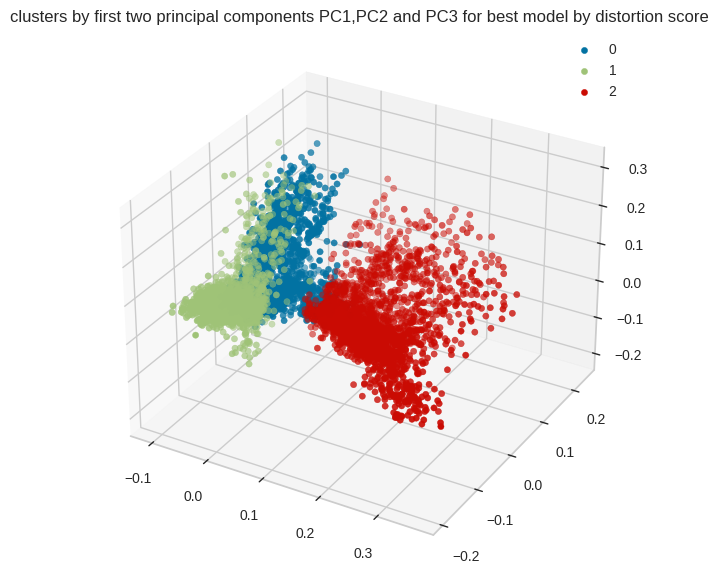

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

#predict the labels of clusters.
label = best_miniKMeans_silhouette.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection ="3d")
plt.title('clusters by first two principal components PC1,PC2 and PC3 for best model by distortion score')
for i in unique_labels:
    ax.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1], X_transformed[label == i , 2] , label = i)
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# for best model by silhoutte score
silhouette = silhouette_score(X_transformed, best_miniKMeans_silhouette.labels_)
db_index = davies_bouldin_score(X_transformed, best_miniKMeans_silhouette.labels_)
ch_index = calinski_harabasz_score(X_transformed, best_miniKMeans_silhouette.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.006495422549880363
Davies-Bouldin Index: 8.398316599558955
Calinski-Harabasz Index: 43.74907975793252


### ML Model - 3

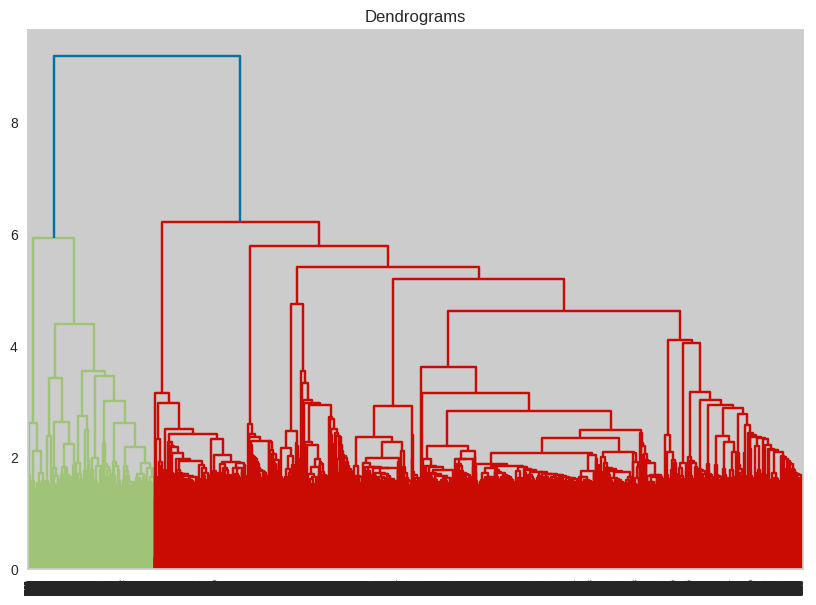

In [ ]:
#checking dendrogram for best number of clusters for agglomerative clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_transformed, method='ward'))

In [ ]:
# ML Model - 3 Implementation
#Fitting our variable in Agglomerative Clusters for ward linkage
from sklearn.cluster import AgglomerativeClustering

aggh_12_clusters = AgglomerativeClustering(n_clusters=12,affinity='euclidean', linkage='ward')

# Fit the Algorithm
aggh_12_clusters.fit(X_transformed)

# Predict on the model
df['aggh_12_clusters']=aggh_12_clusters.labels_

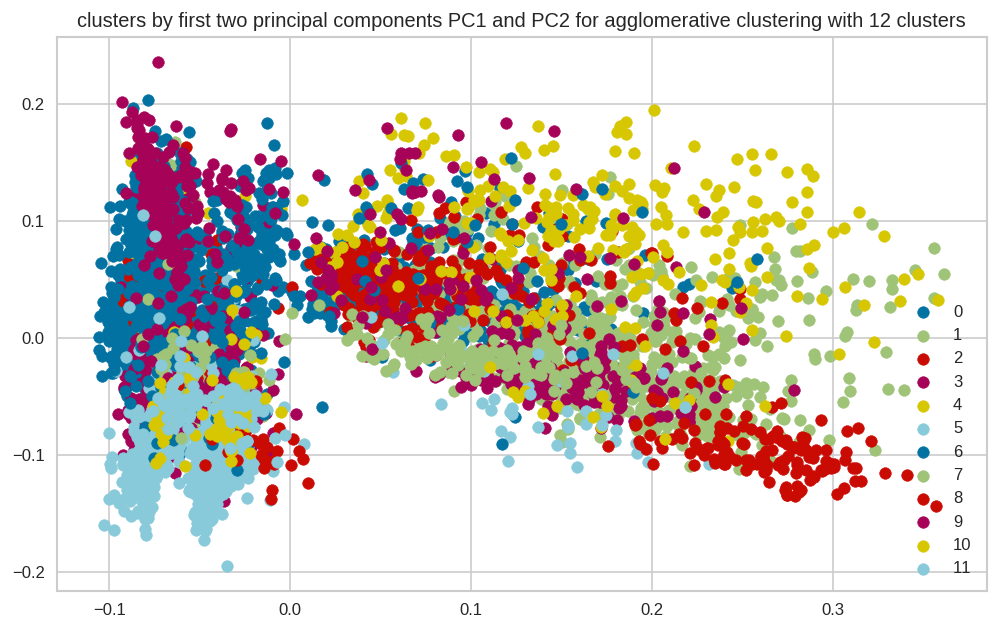

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

#predict the labels of clusters.
label = aggh_12_clusters.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
plt.title('clusters by first two principal components PC1 and PC2 for agglomerative clustering with 12 clusters')
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

<Figure size 1200x720 with 0 Axes>

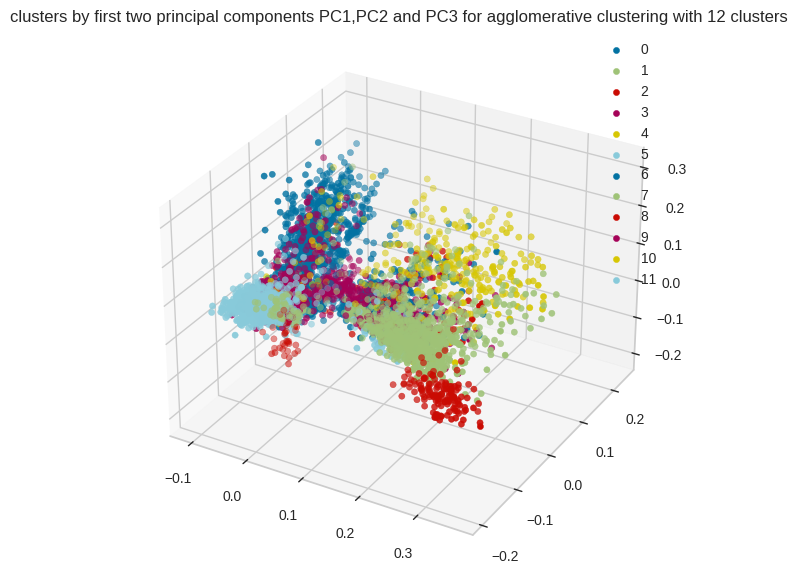

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

#predict the labels of clusters.
label = aggh_12_clusters.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection ="3d")
plt.title('clusters by first two principal components PC1,PC2 and PC3 for agglomerative clustering with 12 clusters')
for i in unique_labels:
    ax.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1], X_transformed[label == i , 2] , label = i)
plt.legend()
plt.show()

In [ ]:
for j in  range(12):

    # Create a string to store all the words.
    comment_words = ''

    # Remove the stopwords.
    stopwords = set(sw)

    # iterate through the column.
    for val in df2[df2['aggh_12_clusters']==j]['clustered']:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1000, height = 500,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10,
                    max_words = 1000,
                    colormap = 'tab10').generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.title(f'Most used words for cluster {j} by agglomerative clustering', fontsize = 30, pad=25)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visualizing evaluation Metric Score chart
silhouette = silhouette_score(X_transformed, aggh_12_clusters.labels_)
db_index = davies_bouldin_score(X_transformed, aggh_12_clusters.labels_)
ch_index = calinski_harabasz_score(X_transformed, aggh_12_clusters.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.00
Davies-Bouldin Index: 9.14
Calinski-Harabasz Index: 54.93


##**Building Cotnent Based Recommender System**

In [68]:
#more libraries for recommender system
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [176]:
# create recommender system
recommender_df=df.set_index('title').drop('show_id',axis=1).copy()

In [177]:
# sparse matrix for the vectorizer
matrix=tfidf.fit_transform(recommender_df['clustered'])

In [178]:
#cosine similarities between different content for recommendations
cosine_sim=cosine_similarity(matrix)
cosine_sim.shape

(7787, 7787)

In [179]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend(title, cosine_sim = cosine_sim):
  try:
    recommended_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommended_content.append(list(recommender_df.index)[i])
    print(f"\033[1mSee similar content to {title} : \033[0m\n")
    return recommended_content

  except:
    return 'No such content available'

In [187]:
recommend('Zindagi Na Milegi Dobara')

See similar content to Zindagi Na Milegi Dobara : 



['Dev.D',
 'Zero',
 'Katha',
 'Raajneeti',
 'Waiting',
 'Shanghai',
 'Luck by Chance',
 'Mahabharat',
 'Jagga Jasoos',
 'Cycle']

In [192]:
recommend('Raajneeti')

See similar content to Raajneeti : 



['Satyagraha',
 'Fitoor',
 'Bhoot',
 'Mahabharat',
 'Welcome',
 'Shakti: The Power',
 'Jagga Jasoos',
 'Apaharan',
 'Zindagi Na Milegi Dobara',
 'Namastey London']

In [189]:
recommend('Gifted')

'No such content available'

In [184]:
recommend('Zozo')

See similar content to Zozo : 



['Life Overtakes Me',
 'West Beirut',
 'Last Breath',
 'Battle',
 'Caliphate',
 'We Are All For The Fatherland',
 'Strong Island',
 'Haunted',
 'A Family Affair',
 'In The Deep']

In [183]:
recommend('3%')

See similar content to 3% : 



['All The Reasons To Forget',
 'Islands of the Future',
 'Dating Around: Brazil',
 'The Underclass',
 'Kissing Game',
 'Blood Pact',
 'The Princess Weiyoung',
 'Back with the Ex',
 'Elite',
 'Lugar de Mulher']

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
!cp clusters.pkl /content/drive/MyDrive/saved

In [ ]:
# Save the File
pickle.dump(best_model_kmeans_silhouette,open('best_model_kmeans_silhouette.pkl','wb'))
pickle.dump(best_miniKMeans_silhouette,open('best_miniKMeans_silhouette.pkl','wb'))
pickle.dump(aggh_12_clusters,open('aggh_12_clusters.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# **Conclusion**

*  In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

*  Then we built a content based recommender system.

*  The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

*  It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing fast. Also, majority of the shows were produced in the United States, India and United Kingdom.

*  It was decided to cluster the data based on the attributes: director, cast, country, genre, and description after combining all the textual data in a single column named clustered. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
Through TFIDF Vectorization, we created a total of 20000 attributes.

*  We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 95% of variance, and hence, the number of components were restricted to 5500.

*  We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score.

*  We then used MiniBatchKMeans to cluster the data, optimum number of cluster came out to be 2.

*  Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

*  We also created WordClouds to see the words that were prominent in a cluster which is clustered by the models and also clusters by the first two and three principal components.